MMI

In [1]:
import sys, os, importlib.util
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

from scipy.constants import lambda2nu, nu2lambda, c
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

In [3]:
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)

modeApi = lumapi.MODE(hide = False)

In [4]:
um = 1e-6
nm = 1e-9

In [5]:
n_c = 1.444
n_r = 3.476
lmbd = 1550*nm
W_m = 7*um
k_0 = 2*np.pi/lmbd
N = 2
m = N+1

In [6]:
sigma = 0
We = W_m + (lmbd / np.pi) * ((n_c / n_r)**(2 * sigma)) * (n_r**2 - n_c**2)**(-0.5)
We/um

7.1560405319904525

In [7]:
neffapx = np.zeros(5)
for i in range(5):
    neffapx[i] = n_r - ((i+1)**2*np.pi*lmbd)/(We**2*4*n_r*k_0)
    kc = (i+1)*np.pi/We

In [8]:
L_pi = 2*np.pi/(neffapx[0]-neffapx[2])*1/k_0 
L_pi/um

np.float64(114.84012409543644)

In [9]:
L = 1/2*L_pi
L/um

np.float64(57.42006204771822)

In [10]:
altura = 220*nm
espessura = 450*nm
comprimento = 2*um
comprimento_taper = 15*um
espessura_taper = 1.5*um

In [11]:
material_waveguide = 'Si (Silicon) - Palik'
material_background = 'SiO2 (Glass) - Palik'

In [12]:
x_MMI = 0
y_MMI = 0
z_MMI = 0

x_taper = L/2 + comprimento_taper/2
y_taper = W_m/6
z_taper = z_MMI

x_waveguide =  L/2 + comprimento_taper + comprimento/2
y_waveguide = y_taper
z_waveguide = z_taper

x_EME_span = L + comprimento_taper*2 + comprimento*2
x_EME = x_EME_span/2 - 0.5*um
port_span = 2*um

In [13]:
lmbd_start = 1.530*um
lmbd_stop = 1.570*um
numberpoint = 100

In [14]:
modeApi.switchtolayout()

modeApi.select('GDS_LAYER_35:4')
modeApi.delete()

modeApi.addstructuregroup()
dev_layer = 'GDS_LAYER_35:4'
modeApi.set('name', dev_layer)

In [15]:
modeApi.switchtolayout()

modeApi.select(f'{dev_layer}::Box')
modeApi.delete()

modeApi.addrect()
modeApi.addtogroup(dev_layer)
modeApi.set('name', 'Box')
modeApi.set('x span', L)
modeApi.set('y span', W_m)
modeApi.set('z span', altura)
modeApi.set('x', x_MMI)
modeApi.set('y', y_MMI)
modeApi.set('z', z_MMI)
modeApi.set('material', material_waveguide)

In [16]:
modeApi.switchtolayout()

modeApi.select(f'{dev_layer}::Taper_00')
modeApi.delete()
modeApi.select(f'{dev_layer}::Taper_01')
modeApi.delete()
modeApi.select(f'{dev_layer}::Taper_10')
modeApi.delete()
modeApi.select(f'{dev_layer}::Taper_11')
modeApi.delete()

modeApi.addobject('linear_taper')
modeApi.addtogroup(dev_layer)
modeApi.set('name', 'Taper_01')
modeApi.set('angle_side', 90)
modeApi.set('thickness', altura)
modeApi.set("width_l", espessura_taper)
modeApi.set("width_r", espessura)
modeApi.set("len", comprimento_taper)
modeApi.set("material", material_waveguide)
modeApi.set("x", x_taper)
modeApi.set("y", y_taper)
modeApi.set("z", z_taper)

modeApi.copy()
modeApi.set('name', 'Taper_11')
modeApi.set("y", -y_taper)

modeApi.copy()
modeApi.set('name', 'Taper_00')
modeApi.set("width_l", espessura)
modeApi.set("width_r", espessura_taper)
modeApi.set("x", -x_taper)
modeApi.set("y", y_taper)

modeApi.copy()
modeApi.set('name', 'Taper_10')
modeApi.set("width_l", espessura)
modeApi.set("width_r", espessura_taper)
modeApi.set("y", -y_taper)

In [17]:
modeApi.switchtolayout()

modeApi.select(f'{dev_layer}::Waveguide_00')
modeApi.delete()
modeApi.select(f'{dev_layer}::Waveguide_01')
modeApi.delete()
modeApi.select(f'{dev_layer}::Waveguide_10')
modeApi.delete()
modeApi.select(f'{dev_layer}::Waveguide_11')
modeApi.delete()

modeApi.addrect()
modeApi.addtogroup(dev_layer)
modeApi.set('name','Waveguide_01')
modeApi.set('x span', comprimento)
modeApi.set('y span', espessura)
modeApi.set('z span', altura)
modeApi.set('x', x_waveguide)
modeApi.set('y', y_waveguide)
modeApi.set('z', z_waveguide)
modeApi.set('material', material_waveguide)

modeApi.copy()
modeApi.set('name','Waveguide_11')
modeApi.set('y', -y_waveguide)

modeApi.copy()
modeApi.set('name','Waveguide_00')
modeApi.set('x', -x_waveguide)
modeApi.set('y', y_waveguide)

modeApi.copy()
modeApi.set('name','Waveguide_10')
modeApi.set('y', -y_waveguide)

In [18]:
modeApi.switchtolayout()

modeApi.select('EME')
modeApi.delete()

modeApi.addeme()

modeApi.set('x',0)
modeApi.set("x min", -x_EME)
modeApi.set('y',0)
modeApi.set('z',0)
modeApi.set('y span', W_m*2.5)
modeApi.set('z span', altura*15)

modeApi.set("background material", material_background)


In [19]:
modeApi.switchtolayout()

cell_waveguide = 1
cell_taper = 16
cell_box = 1

span_waveguide = comprimento - 0.5*um
span_taper = comprimento_taper
span_box = L

method_waveguide = 0
method_taper = 1
method_box = 0

modes_waveguide = 4
modes_taper = 10
modes_box = 32

modeApi.set("number of cell groups", 5)
modeApi.set("group spans", np.block([[span_waveguide], [span_taper], [span_box], [span_taper], [span_waveguide]]))
modeApi.set("cells", np.block([[cell_waveguide], [cell_taper], [cell_box], [cell_taper], [cell_waveguide]]))
modeApi.set("subcell method", np.block([[method_waveguide], [method_taper], [method_box], [method_taper], [method_waveguide]]))
modeApi.set("allow custom eigensolver settings", True)
modeApi.set("modes", np.block([[modes_waveguide], [modes_taper], [modes_box], [modes_taper], [modes_waveguide]]))
modeApi.set("display cells", 1)

modeApi.set("mesh cells y", 100)
modeApi.set("mesh cells z", 100)

modeApi.set("y min bc", "PML")
modeApi.set("y max bc", "PML")
modeApi.set("z min bc", "Symmetric")
modeApi.set("z max bc", "PML")


In [20]:
modeApi.switchtolayout()

modeApi.select("EME::Ports::port_1")
modeApi.delete()
modeApi.addemeport()
modeApi.select("EME::Ports::port_1")
modeApi.set("use full simulation span", 0)
modeApi.set("port location", "left")
modeApi.set("y", y_taper)
modeApi.set("z", 0)
modeApi.set('y span', port_span)
modeApi.set('z span', port_span)
modeApi.set("mode selection", "fundamental TE mode")

modeApi.select("EME::Ports::port_2")
modeApi.delete()
modeApi.addemeport()
modeApi.select("EME::Ports::port_2")
modeApi.set("use full simulation span", 0)
modeApi.set("port location", "left")
modeApi.set("y", -y_taper)
modeApi.set("z", 0)
modeApi.set('y span', port_span)
modeApi.set('z span', port_span)
modeApi.set("mode selection", "fundamental TE mode")

modeApi.select("EME::Ports::port_3")
modeApi.delete()
modeApi.addemeport()
modeApi.select("EME::Ports::port_3")
modeApi.set("use full simulation span", 0)
modeApi.set("port location", "right")
modeApi.set("y", y_taper)
modeApi.set("z", 0)
modeApi.set('y span', port_span)
modeApi.set('z span', port_span)
modeApi.set("mode selection", "fundamental TE mode")

modeApi.select("EME::Ports::port_4")
modeApi.delete()
modeApi.addemeport()
modeApi.select("EME::Ports::port_4")
modeApi.set("use full simulation span", 0)
modeApi.set("port location", "right")
modeApi.set("y", -y_taper)
modeApi.set("z", 0)
modeApi.set('y span', port_span)
modeApi.set('z span', port_span)
modeApi.set("mode selection", "fundamental TE mode")

In [21]:
modeApi.switchtolayout()

modeApi.select("Monitor")
modeApi.delete()
modeApi.addemeprofile()
modeApi.set("name", "Monitor")
modeApi.set("monitor type", 3)
modeApi.set("x", 0)
modeApi.set("x span", x_EME_span)
modeApi.set("y", 0)
modeApi.set("y span", W_m*2.5)
modeApi.set("z", 0)


In [22]:
modeApi.switchtolayout()

modeApi.select('mesh')
modeApi.delete()


modeApi.addmesh()
modeApi.set("x", 0)
modeApi.set("x span", x_EME_span*0.90)
modeApi.set("y", 0)
modeApi.set("y span", W_m*2)
modeApi.set("z", 0)
modeApi.set("z span", altura*5)

modeApi.set('set mesh multiplier', True)
modeApi.set("x mesh multiplier", 4)
modeApi.set("y mesh multiplier", 4)
modeApi.set("z mesh multiplier", 4)

In [23]:
modeApi.save('MMI_SIMULACAO')

In [24]:
modeApi.run()

In [25]:
modeApi.emepropagate()

In [26]:
E = modeApi.getresult('Monitor', 'field profile')

x = E['x']
x = x[:,0]/um

y = E['y']
y = y[:,0]/um

z = E['z']
E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + Ez**2)

C:\Users\edilb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
C:\Users\edilb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
C:\Users\edilb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


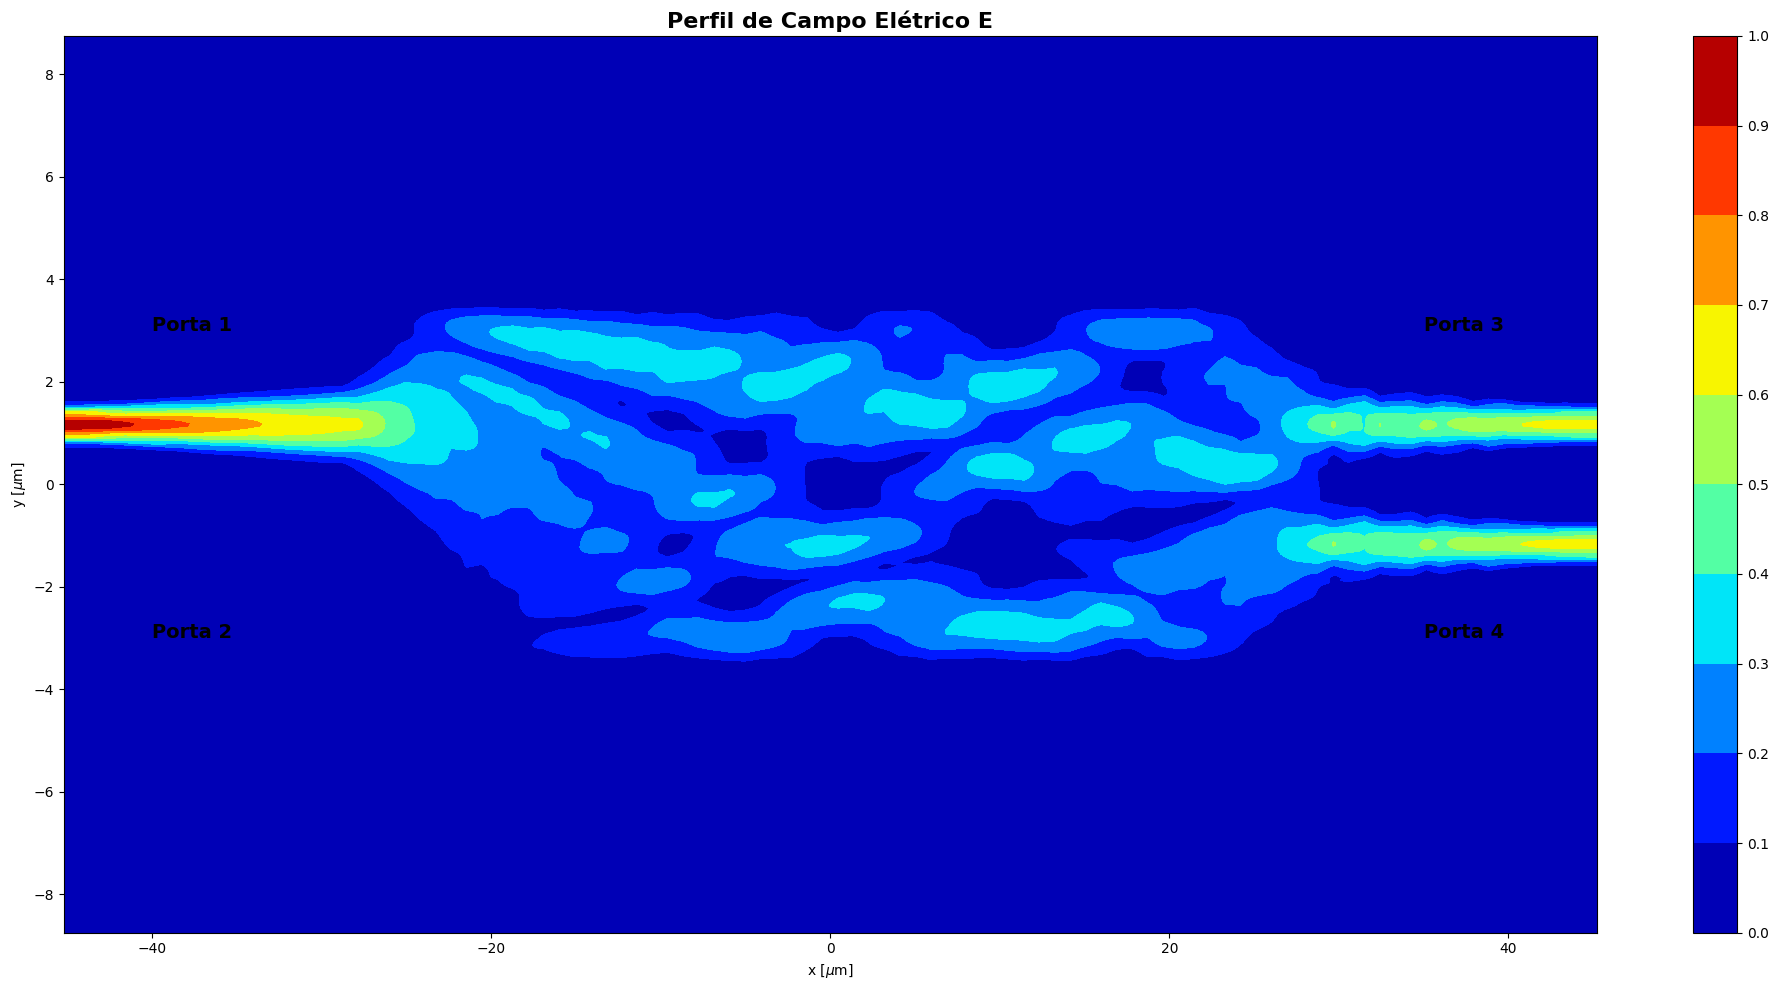

In [27]:
plt.figure(figsize=(20, 10))
mycmap = plt.get_cmap('jet')

v = np.linspace(0,1,11,endpoint=True)

plt.contourf(x,y,np.clip(np.transpose(Emag[:,:,0]), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=v)

plt.title('Perfil de Campo Elétrico E', fontsize = 16, fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.text(-40, 3, 'Porta 1', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(-40, -3, 'Porta 2', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, 3, 'Porta 3', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, -3, 'Porta 4', fontsize = 14, fontweight = 'bold', color = 'k')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - Linear - EME.png')
plt.show()

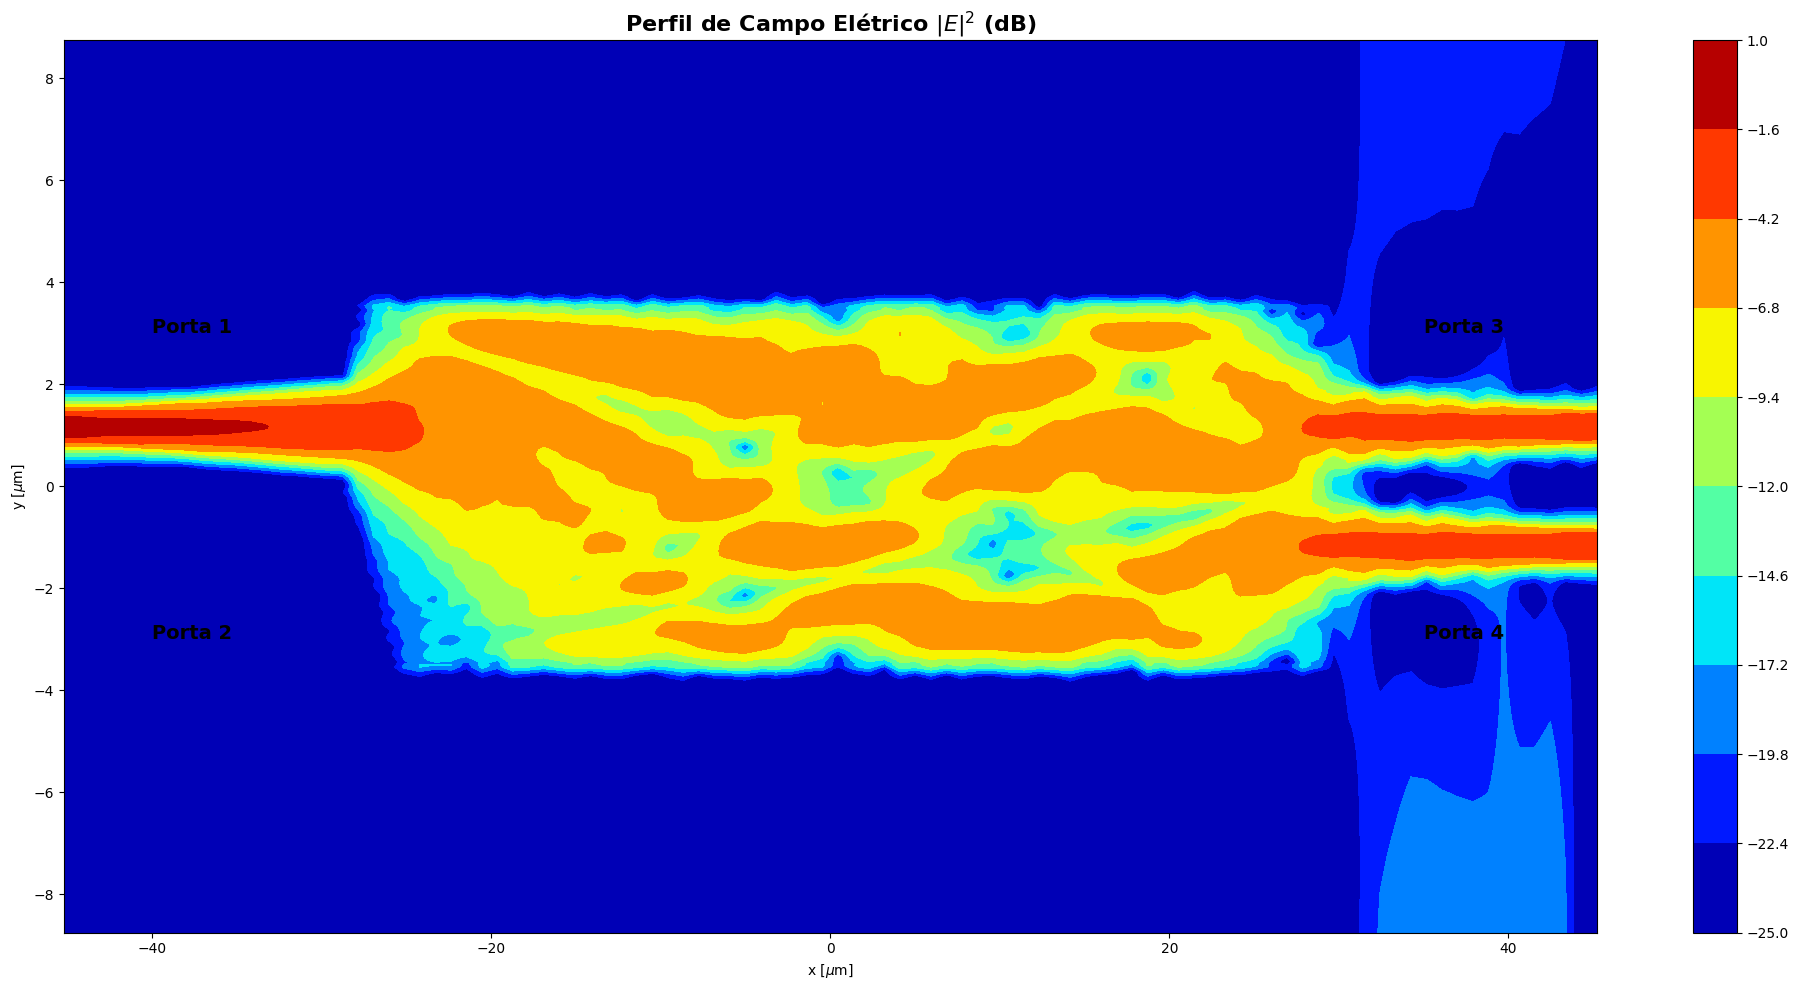

In [28]:
plt.figure(figsize=(20, 10))
mycmap = plt.get_cmap('jet')

v = np.linspace(-25,1,11,endpoint=True)

plt.contourf(x,y,np.clip(10*np.log10(np.transpose(Emag[:,:,0])), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=v)

plt.title(r'Perfil de Campo Elétrico $|E|^2$ (dB)', fontsize = 16,  fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.text(-40, 3, 'Porta 1', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(-40, -3, 'Porta 2', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, 3, 'Porta 3', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, -3, 'Porta 4', fontsize = 14, fontweight = 'bold', color = 'k')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - LOG - EME.png')
plt.show()

In [29]:
modeApi.setemeanalysis('propagation sweep', 1)
modeApi.setemeanalysis('parameter', 'group span 3')
modeApi.setemeanalysis('start', 0.9*span_box)
modeApi.setemeanalysis('stop', 1.1*span_box)
modeApi.setemeanalysis('number of points', numberpoint)

In [30]:
modeApi.emesweep('propagation sweep')

In [31]:
S = modeApi.getemesweep('S')
group_span = S['group_span_3']

T1 = np.abs(S['s11'])**2
T2 = np.abs(S['s21'])**2
T3 = np.abs(S['s31'])**2
T4 = np.abs(S['s41'])**2

T1_dB = 10*np.log10(T1)
T2_dB = 10*np.log10(T2)
T3_dB = 10*np.log10(T3)
T4_dB = 10*np.log10(T4)


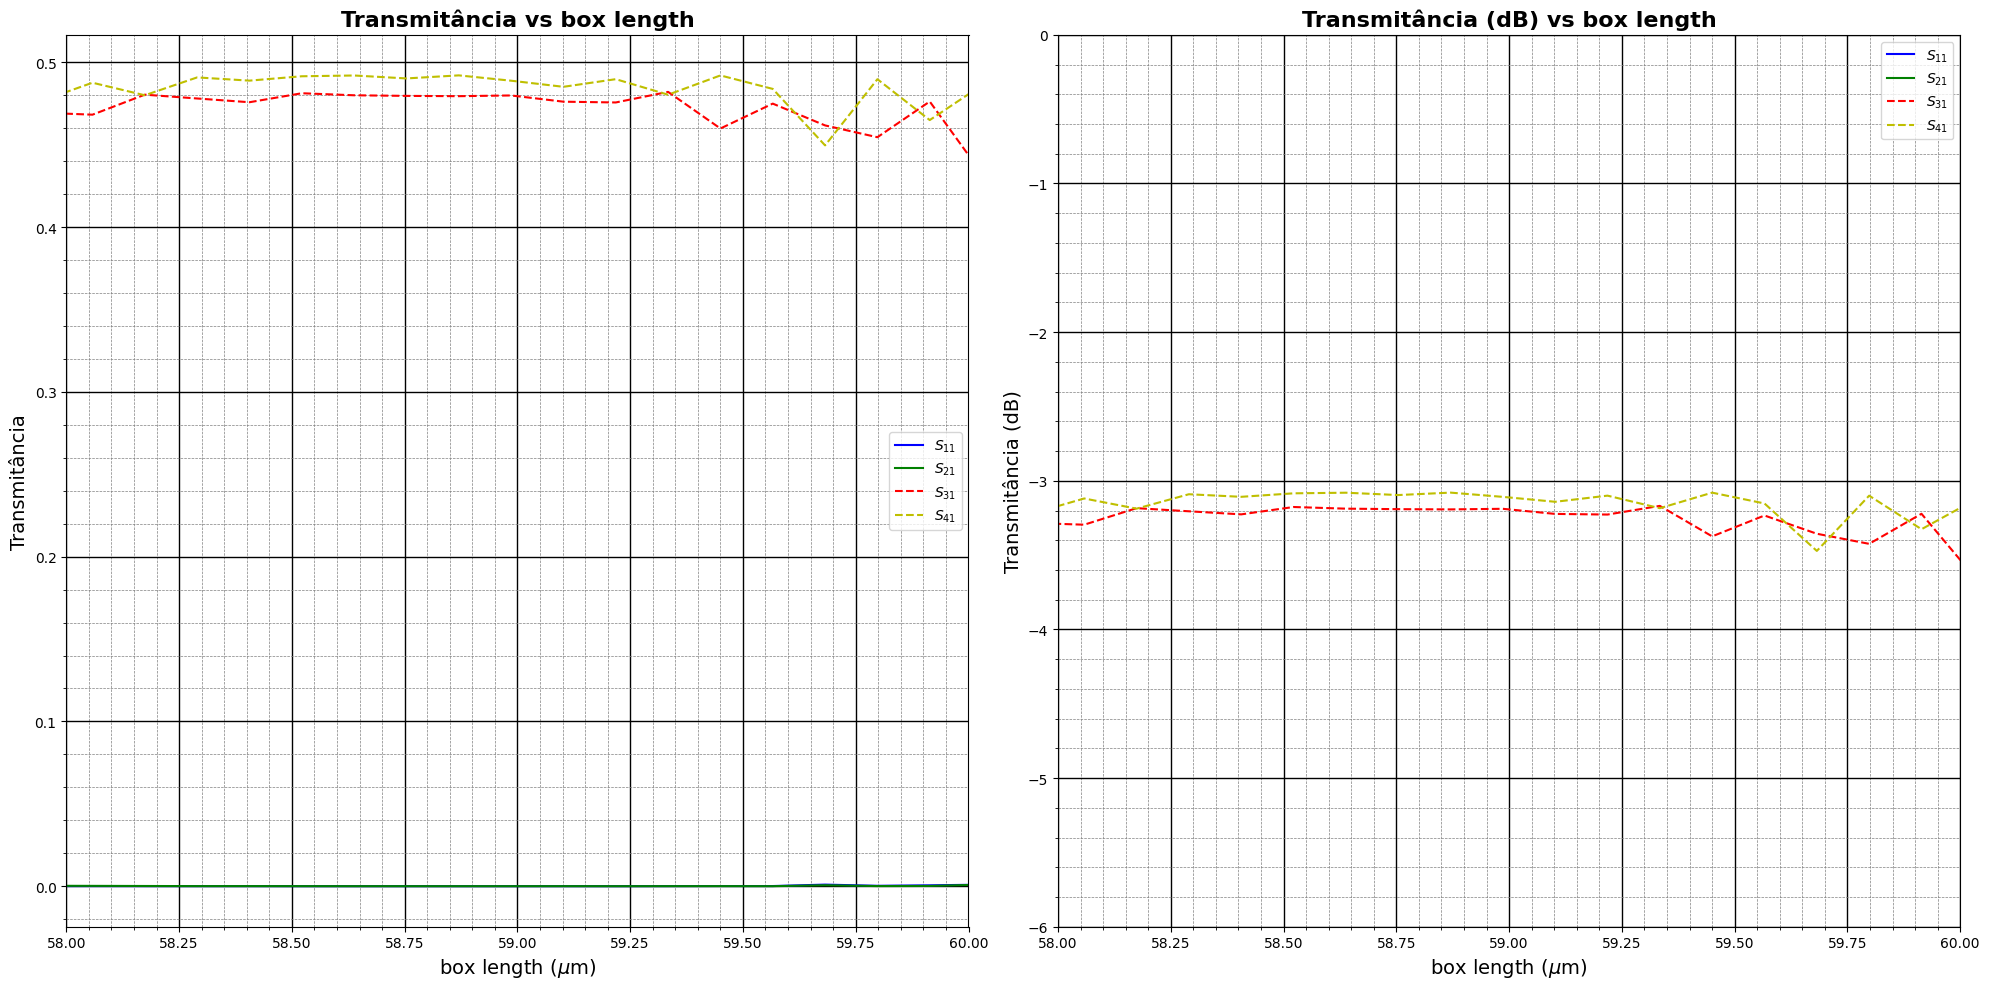

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].plot(group_span/um, T1, 'b', lw=1.5, label='$S_{11}$')
axs[0].plot(group_span/um, T2, 'g', lw=1.5, label='$S_{21}$')
axs[0].plot(group_span/um, T3, 'r--', lw=1.5, label='$S_{31}$')
axs[0].plot(group_span/um, T4, 'y--', lw=1.5, label='$S_{41}$')
axs[0].set_xlabel(r'box length ($\mu$m)', fontsize=14)
axs[0].set_ylabel('Transmitância', fontsize=14)
axs[0].set_title(r'Transmitância vs box length', fontsize=16, fontweight = 'bold',)
axs[0].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[0].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[0].minorticks_on()
axs[0].legend()
axs[0].set_xlim([58,60])

axs[1].plot(group_span/um, T1_dB, 'b', lw=1.5, label='$S_{11}$')
axs[1].plot(group_span/um, T2_dB, 'g', lw=1.5, label='$S_{21}$')
axs[1].plot(group_span/um, T3_dB, 'r--', lw=1.5, label='$S_{31}$')
axs[1].plot(group_span/um, T4_dB, 'y--', lw=1.5, label='$S_{41}$')
axs[1].set_xlabel(r'box length ($\mu$m)', fontsize=14)
axs[1].set_ylabel('Transmitância (dB)', fontsize=14)
axs[1].set_title(r'Transmitância (dB) vs box length', fontsize=16, fontweight = 'bold',)
axs[1].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[1].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[1].minorticks_on()
axs[1].legend()
axs[1].set_xlim([58,60])
axs[1].set_ylim([-6,0])

plt.tight_layout()
plt.savefig('Transmissão nas portas - EME_BOX.png')
plt.show()

In [33]:
modeApi.setemeanalysis('wavelength sweep', 1)
modeApi.setemeanalysis('start wavelength', lmbd_start)
modeApi.setemeanalysis('stop wavelength', lmbd_stop)
modeApi.setemeanalysis('number of wavelength points', numberpoint)
modeApi.setemeanalysis('calculate group delays', 1)

In [34]:
modeApi.emesweep('wavelength sweep')
S = modeApi.getemesweep('S_wavelength_sweep')
Lambda = S['wavelength']

T1 = np.abs(S['s11'])**2
T2 = np.abs(S['s21'])**2
T3 = np.abs(S['s31'])**2
T4 = np.abs(S['s41'])**2

T1_dB = 10*np.log10(T1)
T2_dB = 10*np.log10(T2)
T3_dB = 10*np.log10(T3)
T4_dB = 10*np.log10(T4)

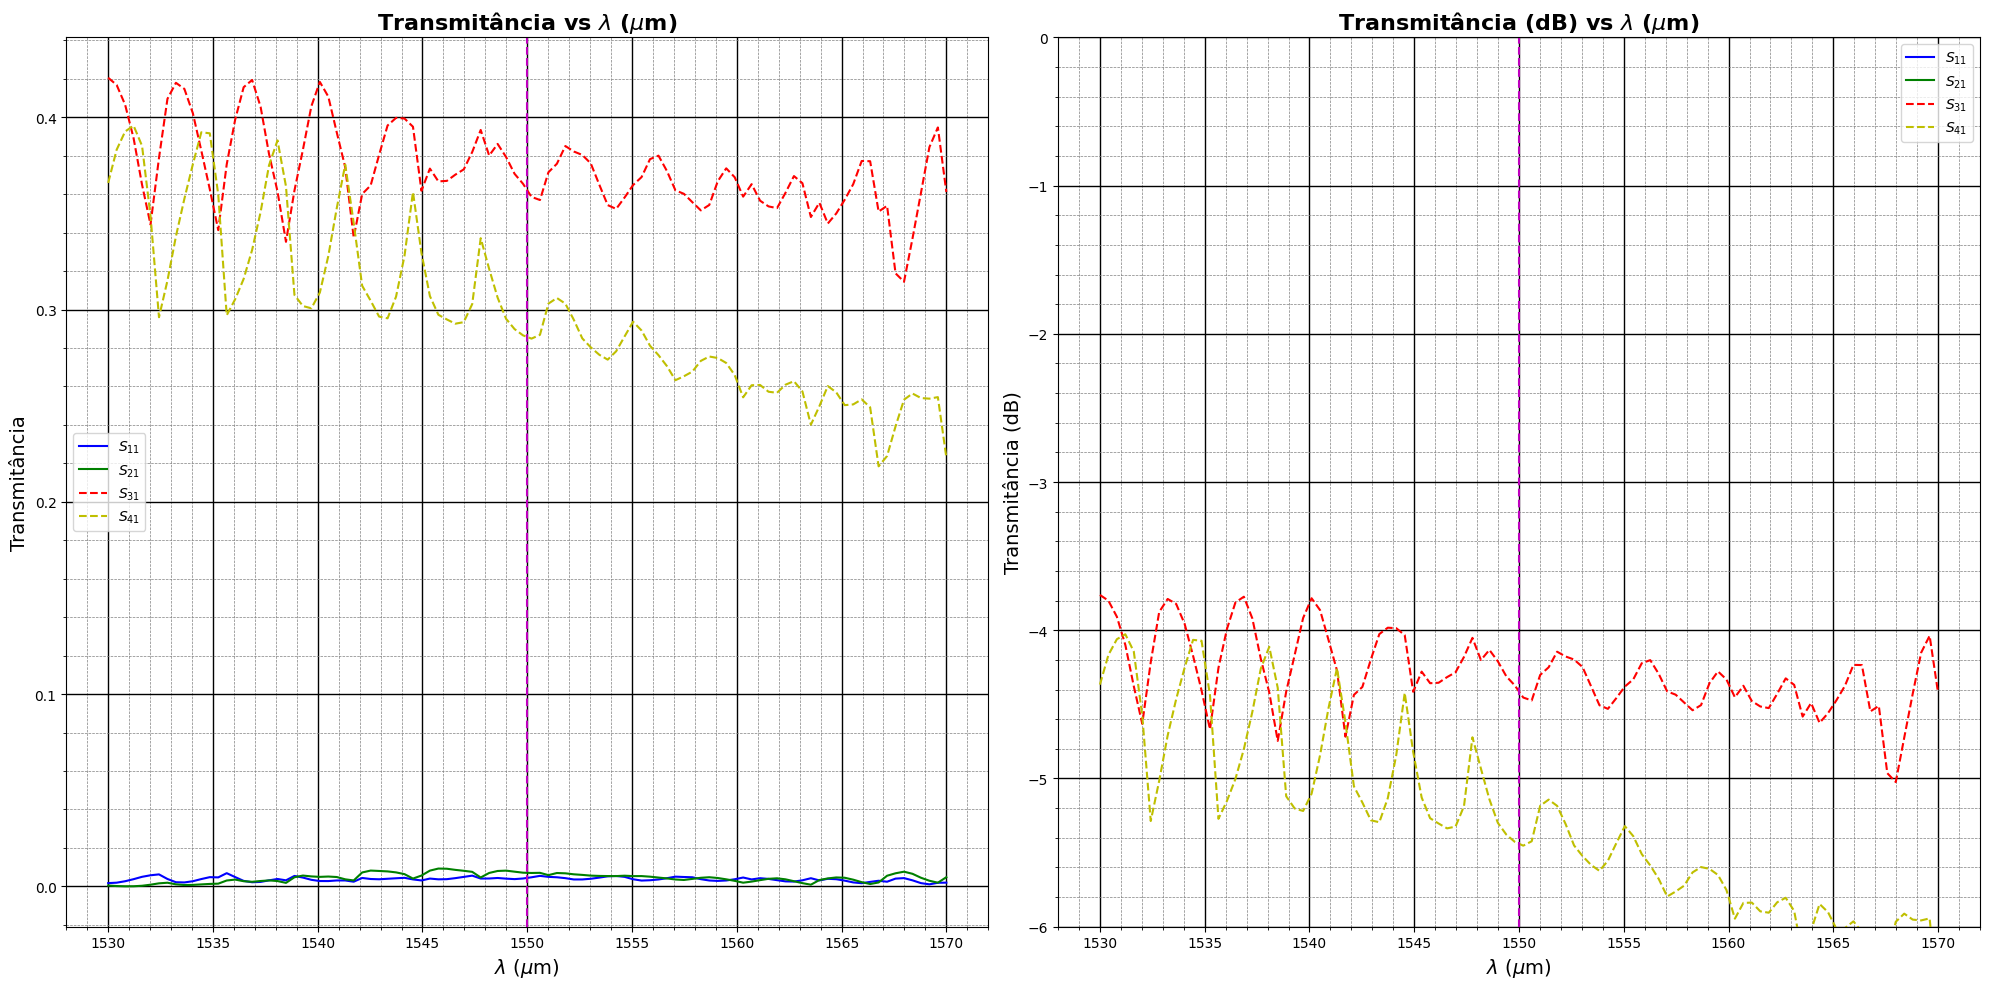

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].plot(Lambda/nm, T1, 'b', lw=1.5, label='$S_{11}$')
axs[0].plot(Lambda/nm, T2, 'g', lw=1.5, label='$S_{21}$')
axs[0].plot(Lambda/nm, T3, 'r--', lw=1.5, label='$S_{31}$')
axs[0].plot(Lambda/nm, T4, 'y--', lw=1.5, label='$S_{41}$')
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[0].set_ylabel('Transmitância', fontsize=14)
axs[0].set_title(r'Transmitância vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[0].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[0].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[0].minorticks_on()
axs[0].legend()
axs[0].axvline(x=lmbd/nm, color='m', linestyle='--')

axs[1].plot(Lambda/nm, T1_dB, 'b', lw=1.5, label='$S_{11}$')
axs[1].plot(Lambda/nm, T2_dB, 'g', lw=1.5, label='$S_{21}$')
axs[1].plot(Lambda/nm, T3_dB, 'r--', lw=1.5, label='$S_{31}$')
axs[1].plot(Lambda/nm, T4_dB, 'y--', lw=1.5, label='$S_{41}$')
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[1].set_ylabel('Transmitância (dB)', fontsize=14)
axs[1].set_title(r'Transmitância (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[1].set_ylim([-6, 0])
axs[1].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[1].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[1].minorticks_on()
axs[1].legend()
axs[1].axvline(x=lmbd/nm, color='m', linestyle='--')

plt.tight_layout()
plt.savefig('Transmissão nas portas - EME.png')
plt.show()

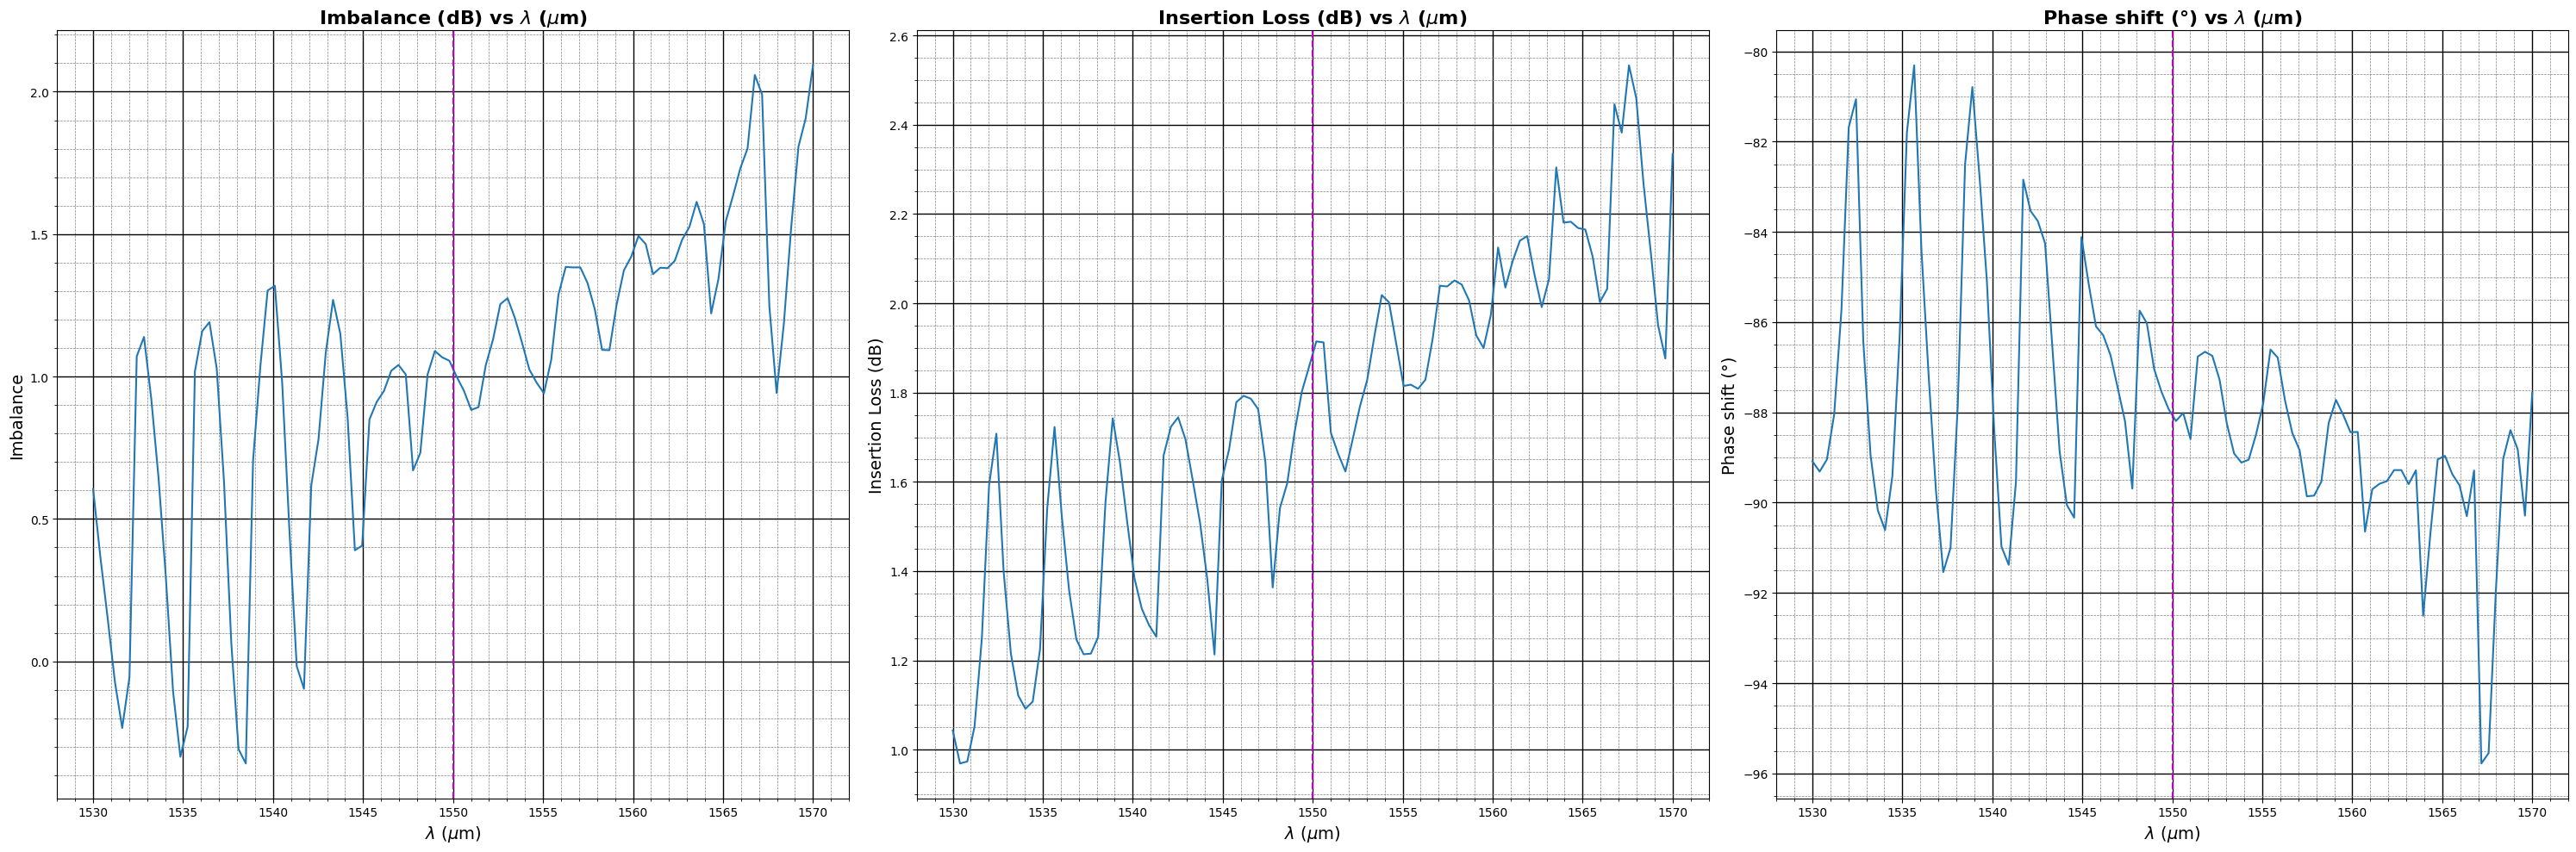

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

Ib = T3_dB - T4_dB
axs[0].plot(Lambda/nm, Ib, lw=1.5)
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[0].set_ylabel('Imbalance', fontsize=14)
axs[0].set_title(r'Imbalance (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold')
axs[0].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[0].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[0].minorticks_on()
axs[0].axvline(x=lmbd/nm, color='m', linestyle='--')

Il = -10*np.log10(T3 + T4)
axs[1].plot(Lambda/nm, Il, lw=1.5)
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[1].set_ylabel('Insertion Loss (dB)', fontsize=14)
axs[1].set_title(r'Insertion Loss (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold')
axs[1].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[1].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[1].minorticks_on()
axs[1].axvline(x=lmbd/nm, color='m', linestyle='--')

phi1 = np.angle(S['s31'])
phi2 = np.angle(S['s41'])
phase = (phi1 - phi2) * (180 / np.pi)

for p in range(len(phase)):
    if abs(phase[p]) > 180:
        phase[p] = phase[p] - 360
    if abs(phase[p]) < -180:
        phase[p] = phase[p] + 360

axs[2].plot(Lambda/nm, phase, lw=1.5)
axs[2].set_xlabel(r"$\lambda$ ($\mu$m)", fontsize=14)
axs[2].set_ylabel("Phase shift (°)", fontsize=14)
axs[2].set_title(r"Phase shift (°) vs $\lambda$ ($\mu$m)", fontsize=16, fontweight = 'bold')
axs[2].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[2].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[2].minorticks_on()
axs[2].axvline(x=lmbd/nm, color='m', linestyle='--')

plt.tight_layout()
plt.savefig('Imbalance e Perda de Inserção nas portas - EME.png')
plt.show()

In [37]:
modeApi.setemeanalysis("group spans", np.block([[span_waveguide], [span_taper], [58.75*um], [span_taper], [span_waveguide]]))
modeApi.getemeanalysis('group spans')

array([[1.500e-06],
       [1.500e-05],
       [5.875e-05],
       [1.500e-05],
       [1.500e-06]])

In [38]:
L = 58.75*um

x_taper = L/2 + comprimento_taper/2
y_taper = W_m/6
z_taper = z_MMI

x_waveguide =  L/2 + comprimento_taper + comprimento/2
y_waveguide = y_taper
z_waveguide = z_taper

x_EME_span = L + comprimento_taper*2 + comprimento*2
x_EME = x_EME_span/2 - 0.5*um

In [39]:
modeApi.switchtolayout()

modeApi.select(f'{dev_layer}::Box')
modeApi.set('x span', L)

modeApi.select(f'{dev_layer}::Taper_00')
modeApi.set('name', 'Taper_00')
modeApi.set("x", -x_taper)
modeApi.set("y", y_taper)
modeApi.set("z", z_taper)

modeApi.select(f'{dev_layer}::Taper_01')
modeApi.set('name', 'Taper_01')
modeApi.set("x", x_taper)
modeApi.set("y", y_taper)
modeApi.set("z", z_taper)

modeApi.select(f'{dev_layer}::Taper_10')
modeApi.set('name', 'Taper_10')
modeApi.set("x", -x_taper)
modeApi.set("y", -y_taper)
modeApi.set("z", z_taper)

modeApi.select(f'{dev_layer}::Taper_11')
modeApi.set('name', 'Taper_11')
modeApi.set("x", x_taper)
modeApi.set("y", -y_taper)
modeApi.set("z", z_taper)

modeApi.select(f'{dev_layer}::Waveguide_00')
modeApi.set('name','Waveguide_00')
modeApi.set('x', -x_waveguide)
modeApi.set('y', y_waveguide)
modeApi.set('z', z_waveguide)


modeApi.select(f'{dev_layer}::Waveguide_01')
modeApi.set('name','Waveguide_01')
modeApi.set('x', x_waveguide)
modeApi.set('y', y_waveguide)
modeApi.set('z', z_waveguide)

modeApi.select(f'{dev_layer}::Waveguide_10')
modeApi.set('name','Waveguide_10')
modeApi.set('x', -x_waveguide)
modeApi.set('y', -y_waveguide)
modeApi.set('z', z_waveguide)

modeApi.select(f'{dev_layer}::Waveguide_11')
modeApi.set('name','Waveguide_11')
modeApi.set('x', x_waveguide)
modeApi.set('y', -y_waveguide)
modeApi.set('z', z_waveguide)

In [40]:
modeApi.switchtolayout()

modeApi.select('EME')
modeApi.set("x min", -x_EME)

span_box = L

modeApi.set("number of cell groups", 5)
modeApi.set("group spans", np.block([[span_waveguide], [span_taper], [span_box], [span_taper], [span_waveguide]]))
modeApi.set("cells", np.block([[cell_waveguide], [cell_taper], [cell_box], [cell_taper], [cell_waveguide]]))
modeApi.set("subcell method", np.block([[method_waveguide], [method_taper], [method_box], [method_taper], [method_waveguide]]))
modeApi.set("allow custom eigensolver settings", True)
modeApi.set("modes", np.block([[modes_waveguide], [modes_taper], [modes_box], [modes_taper], [modes_waveguide]]))
modeApi.set("display cells", 1)

modeApi.select("Monitor")
modeApi.set("x span", x_EME_span-1*um)

modeApi.select('mesh')
modeApi.set("x span", x_EME_span*0.90)

modeApi.save('MMI_SIMULACAO')

In [41]:
modeApi.run()

In [42]:
modeApi.emepropagate()

In [43]:
E = modeApi.getresult('Monitor', 'field profile')

x = E['x']
x = x[:,0]/um

y = E['y']
y = y[:,0]/um

z = E['z']
E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + Ez**2)

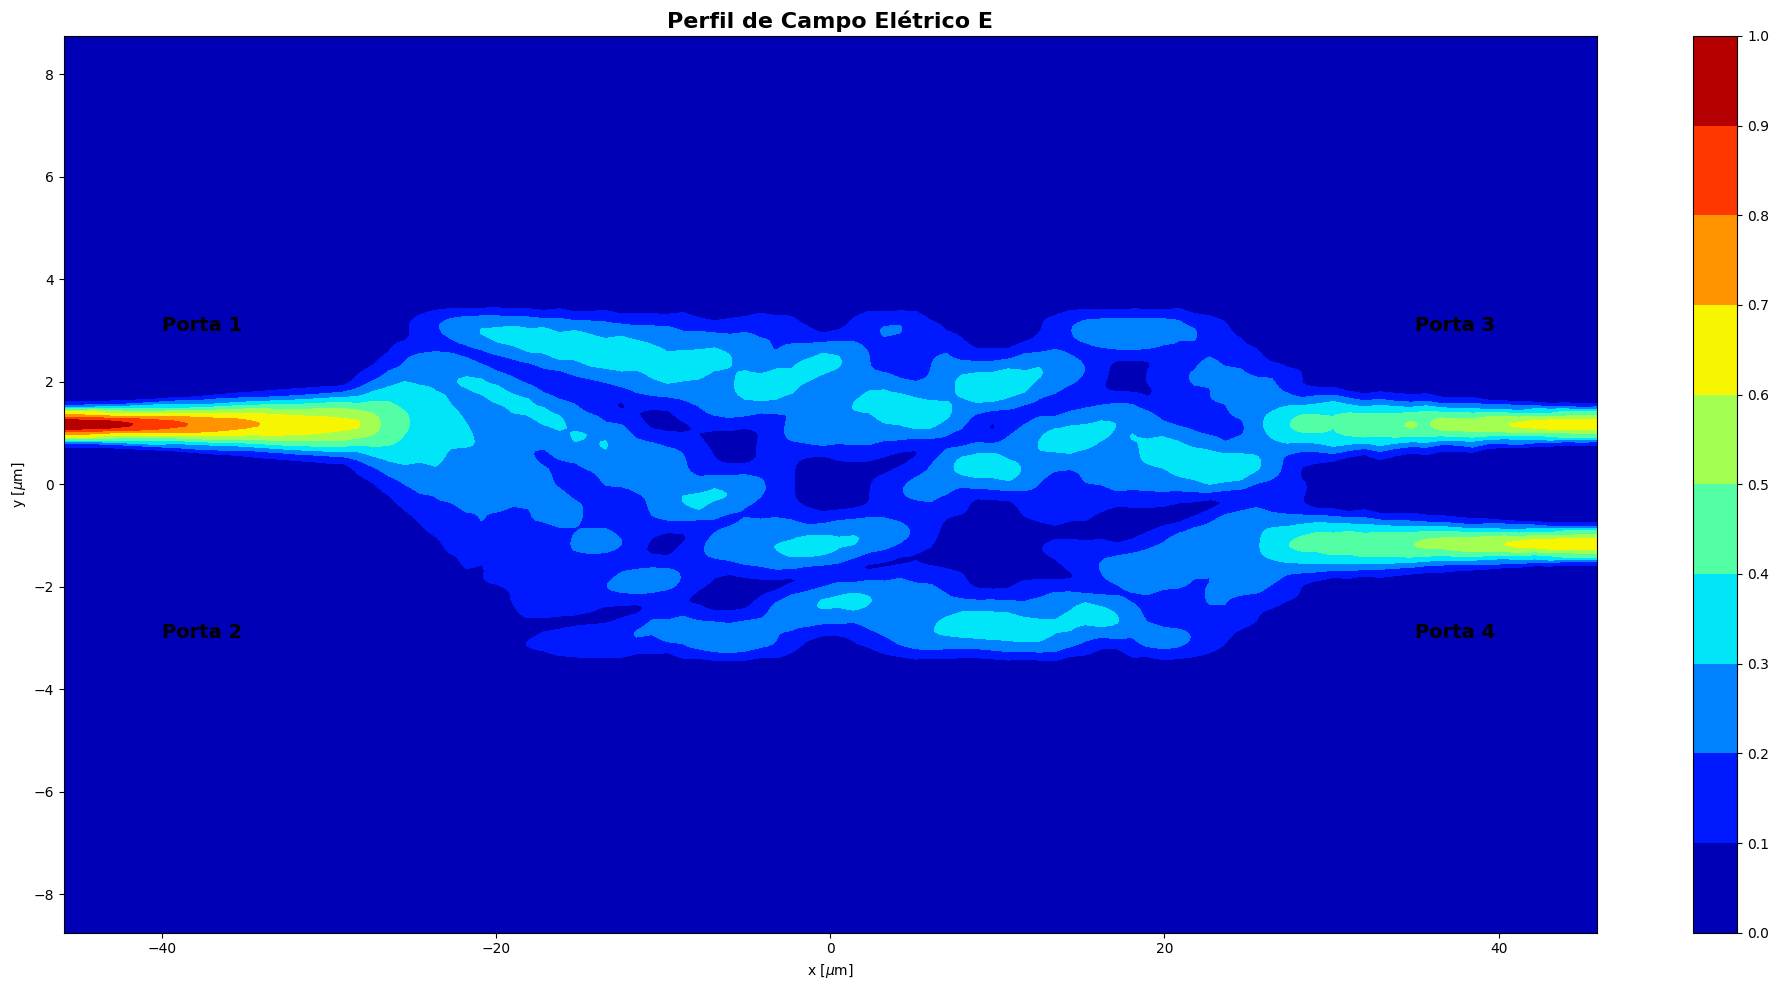

In [44]:
plt.figure(figsize=(20, 10))
mycmap = plt.get_cmap('jet')

v = np.linspace(0,1,11,endpoint=True)

plt.contourf(x,y,np.clip(np.transpose(Emag[:,:,0]), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=v)

plt.title('Perfil de Campo Elétrico E', fontsize = 16, fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.text(-40, 3, 'Porta 1', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(-40, -3, 'Porta 2', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, 3, 'Porta 3', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, -3, 'Porta 4', fontsize = 14, fontweight = 'bold', color = 'k')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - Linear - EME_NEW.png')
plt.show()

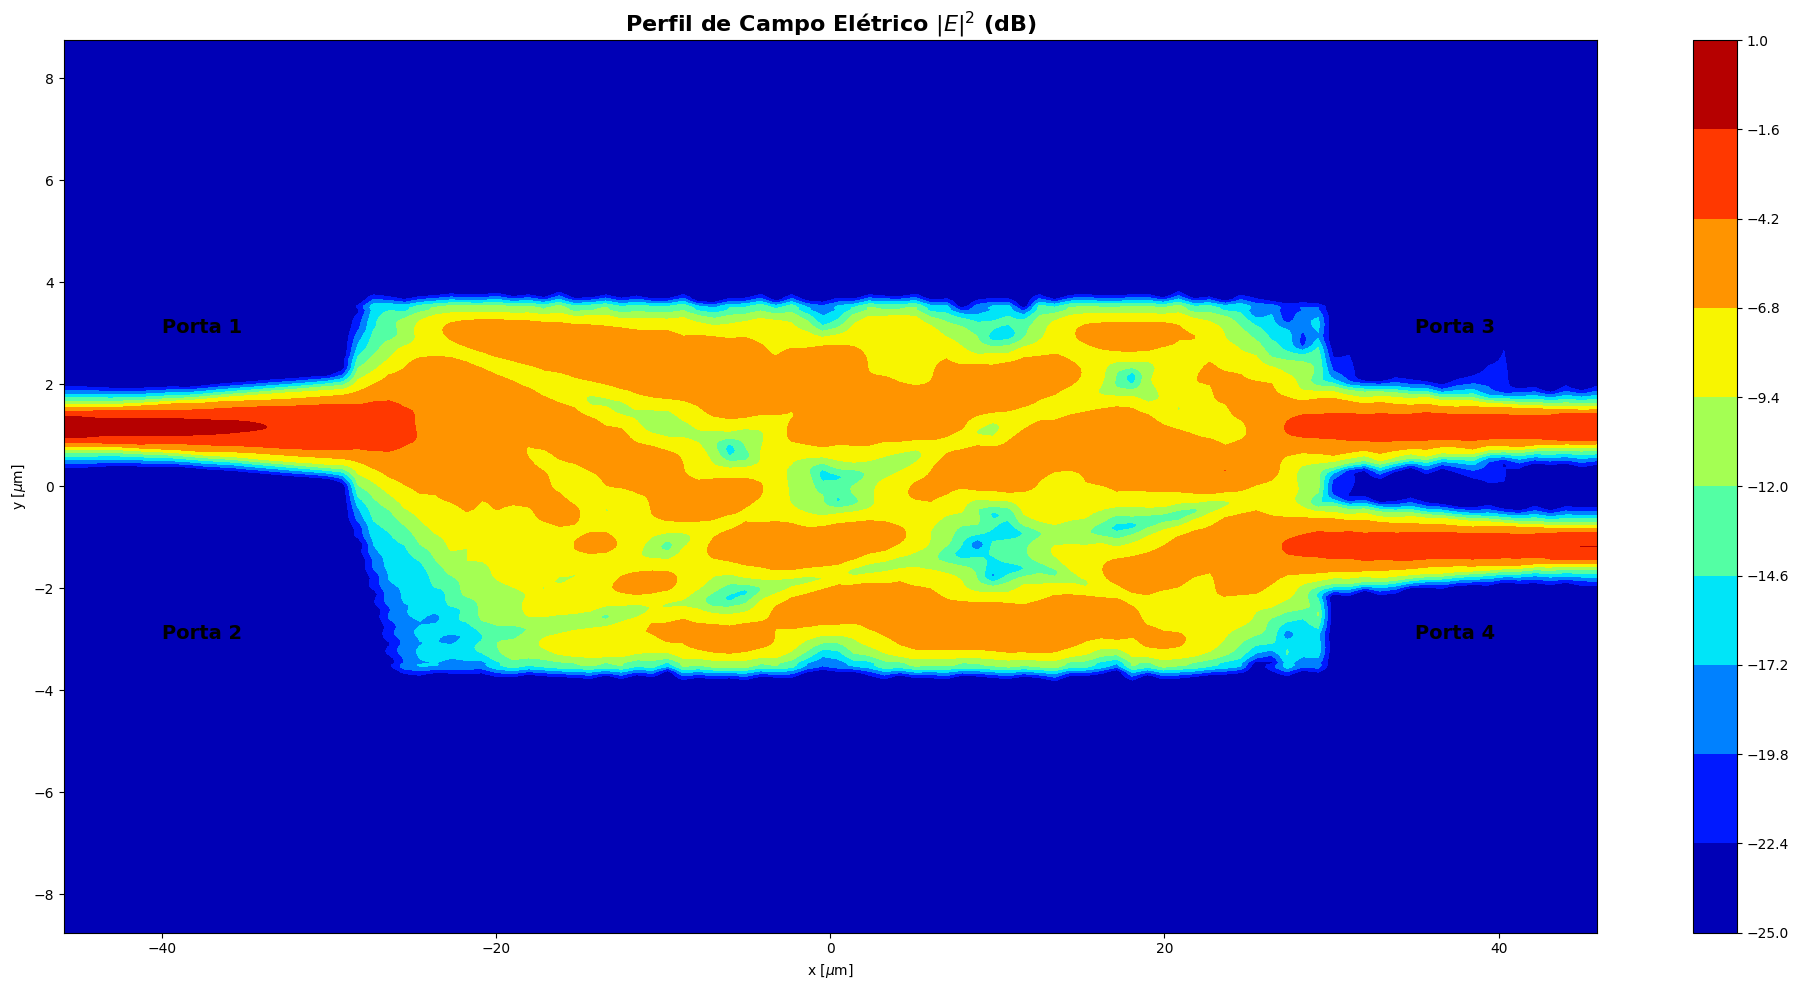

In [45]:
plt.figure(figsize=(20, 10))
mycmap = plt.get_cmap('jet')

v = np.linspace(-25,1,11,endpoint=True)

plt.contourf(x,y,np.clip(10*np.log10(np.transpose(Emag[:,:,0])), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=v)

plt.title(r'Perfil de Campo Elétrico $|E|^2$ (dB)', fontsize = 16,  fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.text(-40, 3, 'Porta 1', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(-40, -3, 'Porta 2', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, 3, 'Porta 3', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, -3, 'Porta 4', fontsize = 14, fontweight = 'bold', color = 'k')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - LOG - EME_NEW.png')
plt.show()

In [46]:
modeApi.setemeanalysis('wavelength sweep', 1)
modeApi.setemeanalysis('start wavelength', lmbd_start)
modeApi.setemeanalysis('stop wavelength', lmbd_stop)
modeApi.setemeanalysis('number of wavelength points', numberpoint)
modeApi.setemeanalysis('calculate group delays', 1)

In [47]:
modeApi.emesweep('wavelength sweep')
S = modeApi.getemesweep('S_wavelength_sweep')
Lambda = S['wavelength']

T1 = np.abs(S['s11'])**2
T2 = np.abs(S['s21'])**2
T3 = np.abs(S['s31'])**2
T4 = np.abs(S['s41'])**2

T1_dB = 10*np.log10(T1)
T2_dB = 10*np.log10(T2)
T3_dB = 10*np.log10(T3)
T4_dB = 10*np.log10(T4)

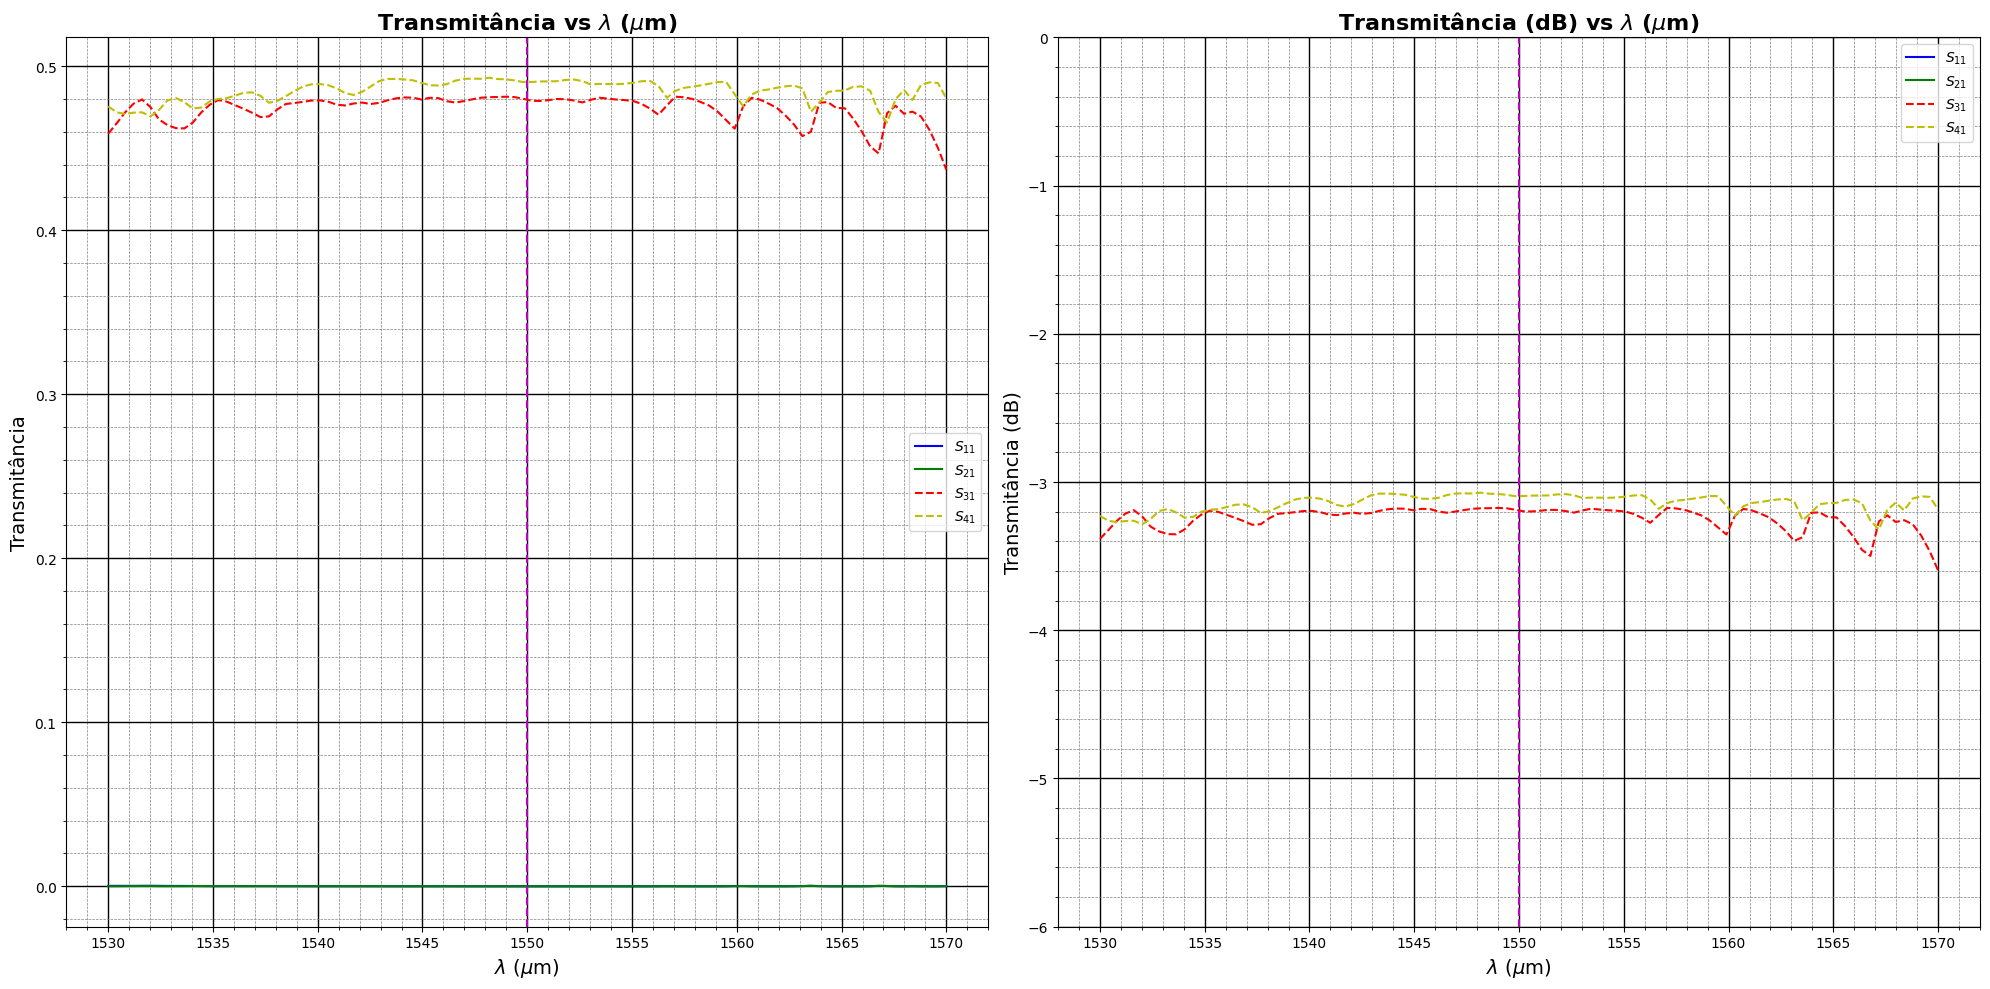

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].plot(Lambda/nm, T1, 'b', lw=1.5, label='$S_{11}$')
axs[0].plot(Lambda/nm, T2, 'g', lw=1.5, label='$S_{21}$')
axs[0].plot(Lambda/nm, T3, 'r--', lw=1.5, label='$S_{31}$')
axs[0].plot(Lambda/nm, T4, 'y--', lw=1.5, label='$S_{41}$')
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[0].set_ylabel('Transmitância', fontsize=14)
axs[0].set_title(r'Transmitância vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[0].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[0].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[0].minorticks_on()
axs[0].legend()
axs[0].axvline(x=lmbd/nm, color='m', linestyle='--')

axs[1].plot(Lambda/nm, T1_dB, 'b', lw=1.5, label='$S_{11}$')
axs[1].plot(Lambda/nm, T2_dB, 'g', lw=1.5, label='$S_{21}$')
axs[1].plot(Lambda/nm, T3_dB, 'r--', lw=1.5, label='$S_{31}$')
axs[1].plot(Lambda/nm, T4_dB, 'y--', lw=1.5, label='$S_{41}$')
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[1].set_ylabel('Transmitância (dB)', fontsize=14)
axs[1].set_title(r'Transmitância (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[1].set_ylim([-6, 0])
axs[1].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[1].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[1].minorticks_on()
axs[1].legend()
axs[1].axvline(x=lmbd/nm, color='m', linestyle='--')

plt.tight_layout()
plt.savefig('Transmissão nas portas - EME_NEW.png')
plt.show()

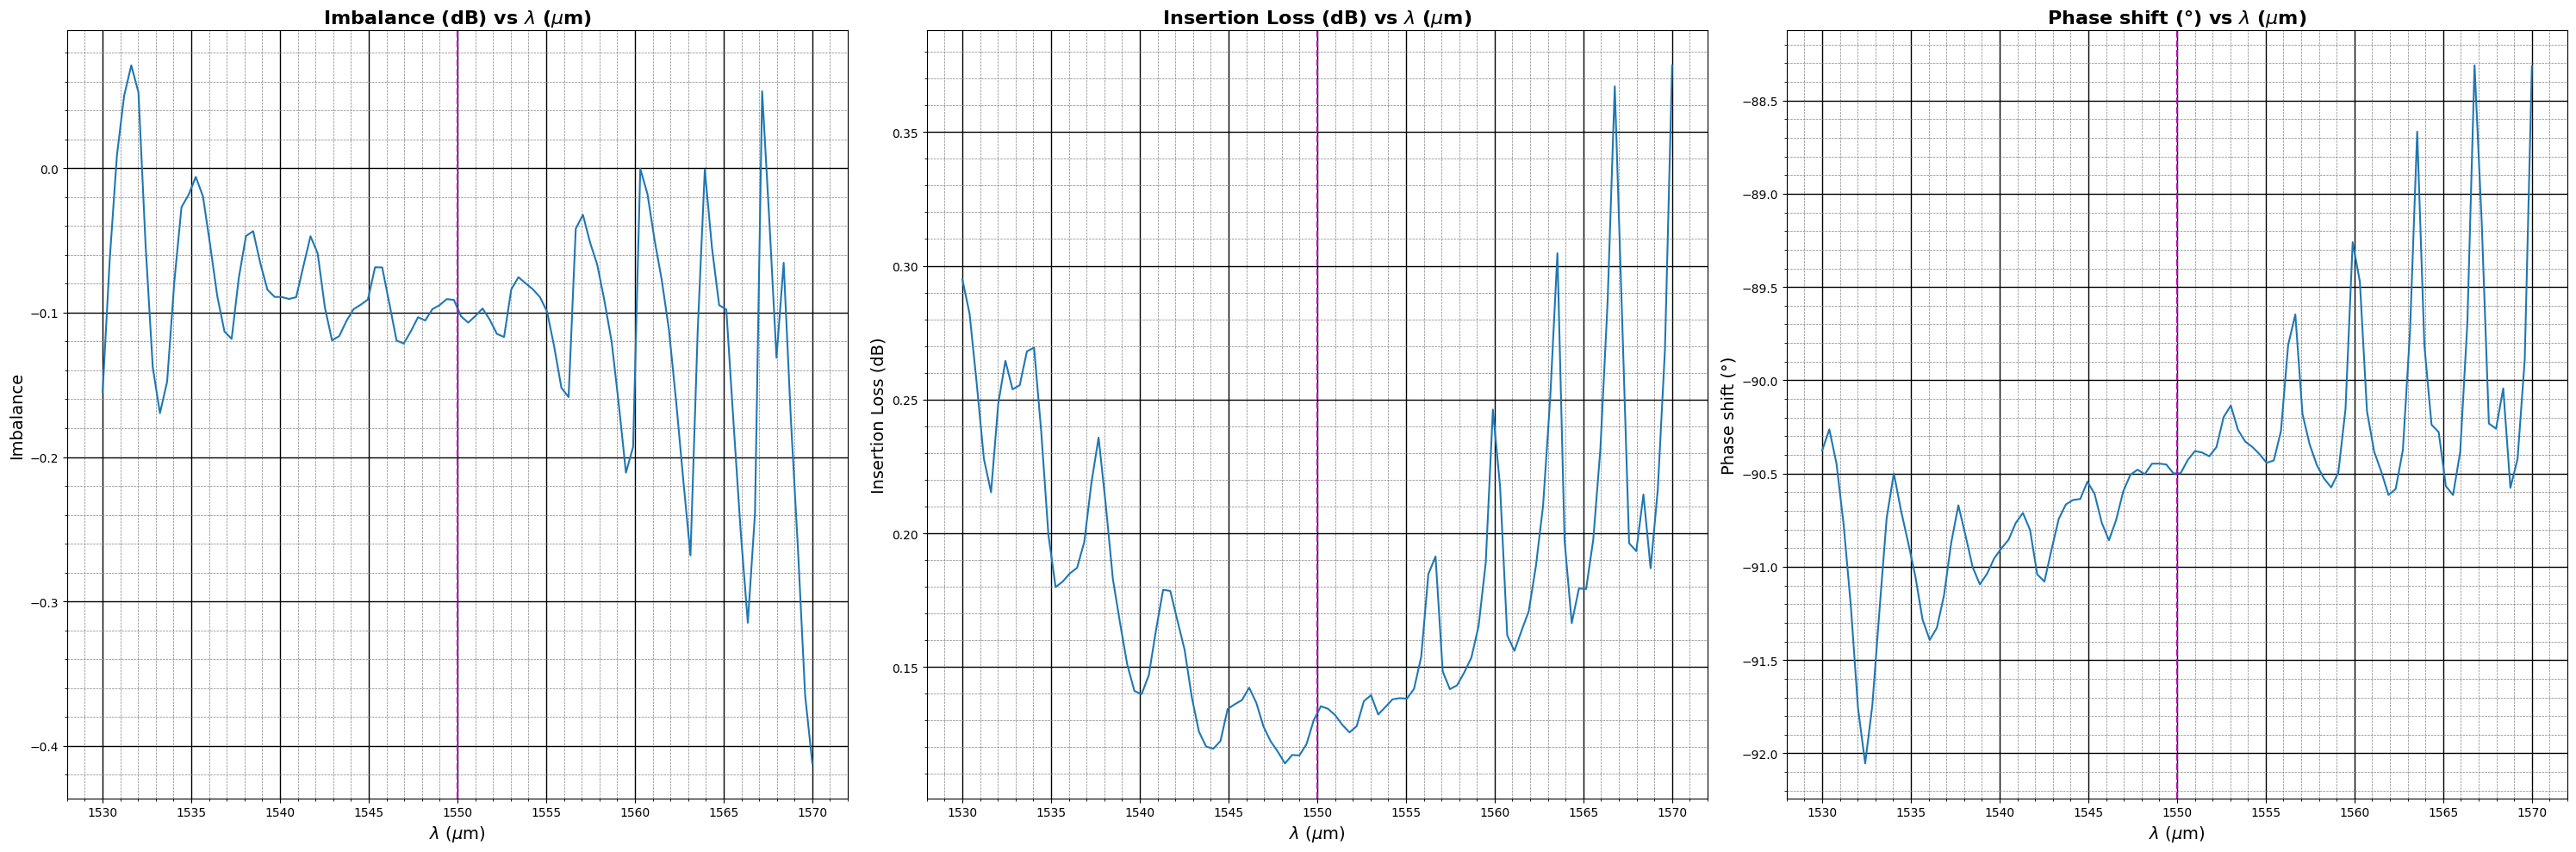

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

Ib = T3_dB - T4_dB
axs[0].plot(Lambda/nm, Ib, lw=1.5)
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[0].set_ylabel('Imbalance', fontsize=14)
axs[0].set_title(r'Imbalance (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold')
axs[0].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[0].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[0].minorticks_on()
axs[0].axvline(x=lmbd/nm, color='m', linestyle='--')

Il = -10*np.log10(T3 + T4)
axs[1].plot(Lambda/nm, Il, lw=1.5)
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[1].set_ylabel('Insertion Loss (dB)', fontsize=14)
axs[1].set_title(r'Insertion Loss (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold')
axs[1].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[1].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[1].minorticks_on()
axs[1].axvline(x=lmbd/nm, color='m', linestyle='--')

phi1 = np.angle(S['s31'])
phi2 = np.angle(S['s41'])
phase = (phi1 - phi2) * (180 / np.pi)

for p in range(len(phase)):
    if abs(phase[p]) > 180:
        phase[p] = phase[p] - 360
    if abs(phase[p]) < -180:
        phase[p] = phase[p] + 360

axs[2].plot(Lambda/nm, phase, lw=1.5)
axs[2].set_xlabel(r"$\lambda$ ($\mu$m)", fontsize=14)
axs[2].set_ylabel("Phase shift (°)", fontsize=14)
axs[2].set_title(r"Phase shift (°) vs $\lambda$ ($\mu$m)", fontsize=16, fontweight = 'bold')
axs[2].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[2].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[2].minorticks_on()
axs[2].axvline(x=lmbd/nm, color='m', linestyle='--')

plt.tight_layout()
plt.savefig('Imbalance e Perda de Inserção nas portas - EME_NEW.png')
plt.show()

In [50]:
test_points = np.array([[-L/2.5, 0.9*W_m/2],
                        [L/2.5, -0.9*W_m],
                        [L/2.5, 0.9*W_m],
                        [-L/2.5, -0.9*W_m/2]])

lmbd_start = 1.530*um
lmbd_stop = 1.570*um

numberpoint = 50
time_simulation = (L + 2*comprimento_taper + 2*comprimento)*7/c + 200e-15

modeApi.switchtolayout()

modeApi.select('varFDTD')
modeApi.delete()

modeApi.addvarfdtd()
modeApi.set('x', 0)
modeApi.set('y', 0)
modeApi.set('z', 0)
modeApi.set("x span", x_EME_span)
modeApi.set('y span', W_m*2.5)
modeApi.set('z span', altura*15)
modeApi.set('x0', -L/2 + 1e-6)
modeApi.set('background material', material_background)
modeApi.set('global monitor frequency points', numberpoint)
modeApi.set('test points', test_points)
modeApi.set('simulation time', time_simulation)

modeApi.set('bandwidth', 'broadband')
modeApi.set('mesh accuracy', 5)

modeApi.set("x min bc", "PML")
modeApi.set("x max bc", "PML")
modeApi.set("y min bc", "PML")
modeApi.set("y max bc", "PML")
modeApi.set("z min bc", "Symmetric")
modeApi.set("z max bc", "PML")


modeApi.select('source_1')
modeApi.delete()

modeApi.addmodesource()
modeApi.set('name', 'source_1')
modeApi.set('x', -(L/2 + comprimento_taper))
modeApi.set('y', y_taper)
modeApi.set('y span', port_span)
modeApi.set('wavelength start', lmbd_start)
modeApi.set('wavelength stop', lmbd_stop)
modeApi.set('direction', 'Forward')

modeApi.select('monitor')
modeApi.delete()

modeApi.addprofile()
modeApi.set('x', 0)
modeApi.set('y', 0)
modeApi.set("x span", x_EME_span)
modeApi.set("y span", W_m*2.5)

modeApi.select('Porta 1')
modeApi.delete()
modeApi.select('Porta 2')
modeApi.delete()
modeApi.select('Porta 3')
modeApi.delete()
modeApi.select('Porta 4')
modeApi.delete()

modeApi.addpower()
modeApi.set('name', 'Porta 1')
modeApi.set('monitor type', 5)
modeApi.set('x', -(L/2 + comprimento_taper))
modeApi.set('y', y_taper)
modeApi.set("z", 0)
modeApi.set('y span', port_span)
modeApi.set('z span', port_span)

modeApi.addpower()
modeApi.set('name', 'Porta 2')
modeApi.set('monitor type', 5)
modeApi.set('x', -(L/2 + comprimento_taper))
modeApi.set('y', -y_taper)
modeApi.set("z", 0)
modeApi.set('y span', port_span)
modeApi.set('z span', port_span)

modeApi.addpower()
modeApi.set('name', 'Porta 3')
modeApi.set('monitor type', 5)
modeApi.set('x', L/2 + comprimento_taper)
modeApi.set('y', y_taper)
modeApi.set("z", 0)
modeApi.set('y span', port_span)
modeApi.set('z span', port_span)

modeApi.addpower()
modeApi.set('name', 'Porta 4')
modeApi.set('monitor type', 5)
modeApi.set('x', L/2 + comprimento_taper)
modeApi.set('y', -y_taper)
modeApi.set("z", 0)
modeApi.set('y span', port_span)
modeApi.set('z span', port_span)

modeApi.select('mesh')
modeApi.set('enabled', 0)

modeApi.save('MMI_SIMULACAO')


In [51]:
modeApi.run()

In [52]:
E = modeApi.getresult('monitor', 'E')

x = E['x']
x = x[:,0]/um

y = E['y']
y = y[:,0]/um

z = E['z']
E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + Ez**2)

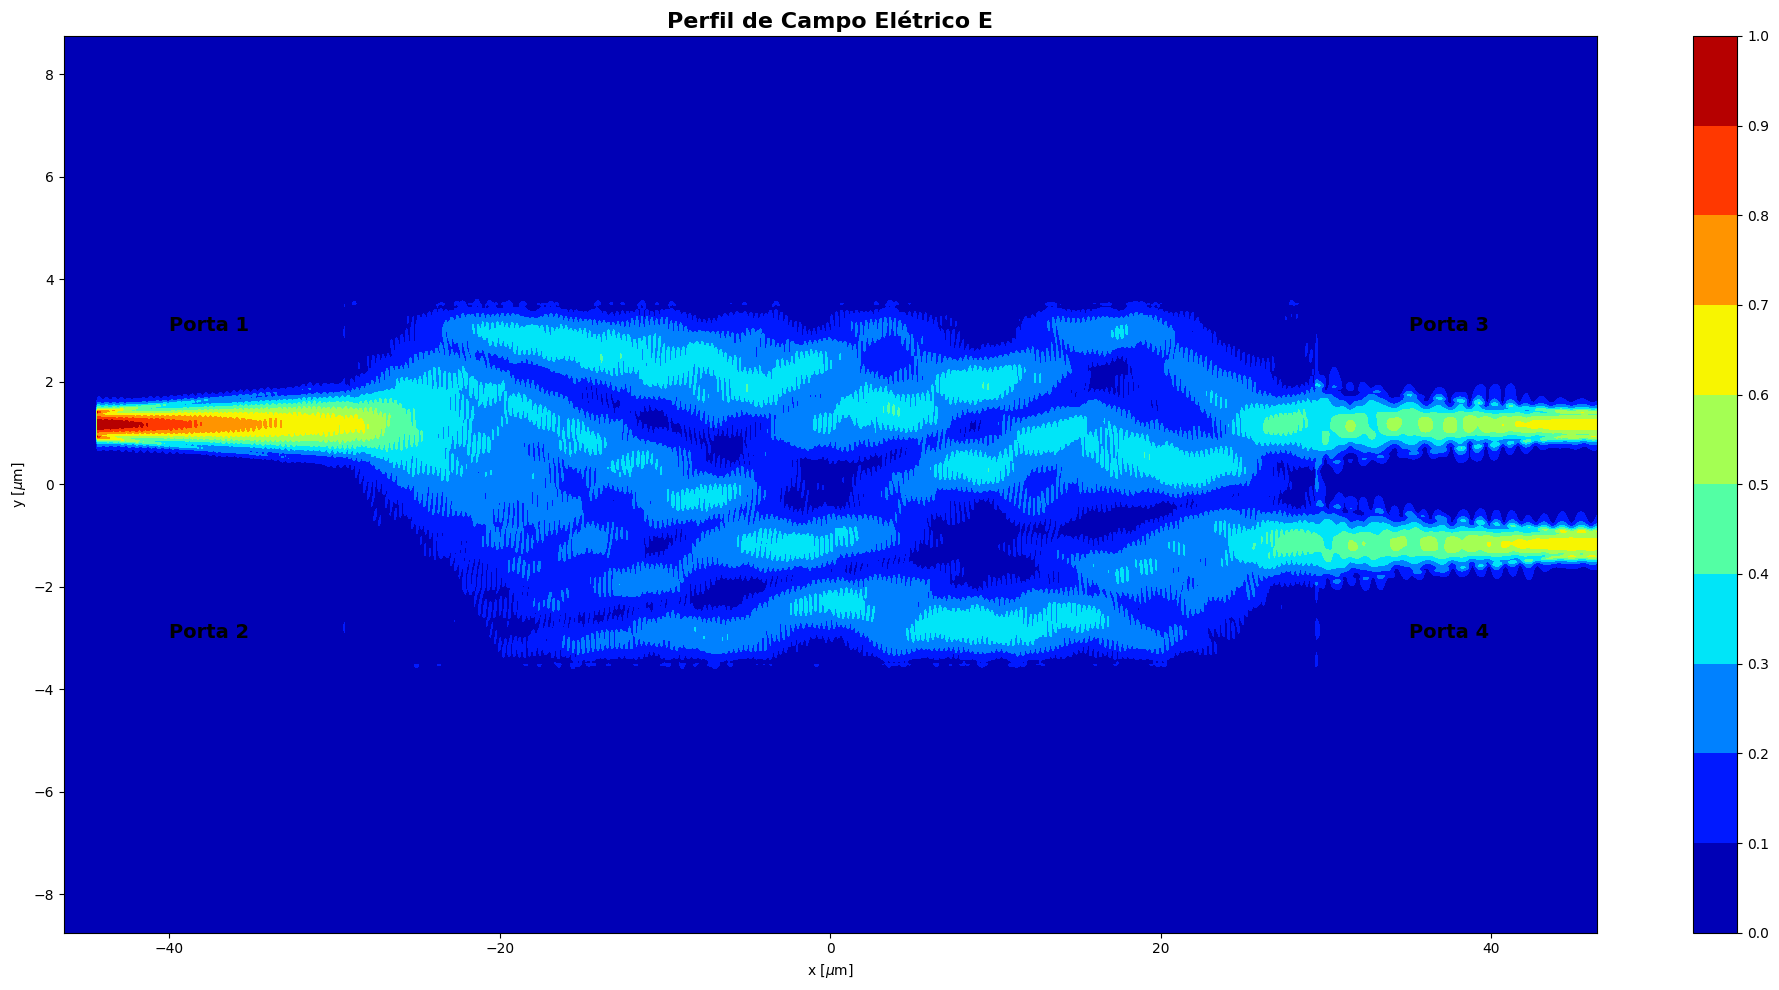

In [53]:
plt.figure(figsize=(20, 10))
mycmap = plt.get_cmap('jet')

v = np.linspace(0,1,11,endpoint=True)

plt.contourf(x,y,np.clip(np.transpose(Emag[:,:,0]), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=v)

plt.title('Perfil de Campo Elétrico E', fontsize = 16, fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.text(-40, 3, 'Porta 1', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(-40, -3, 'Porta 2', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, 3, 'Porta 3', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, -3, 'Porta 4', fontsize = 14, fontweight = 'bold', color = 'k')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - Linear - varFDTD - TE.png')
plt.show()

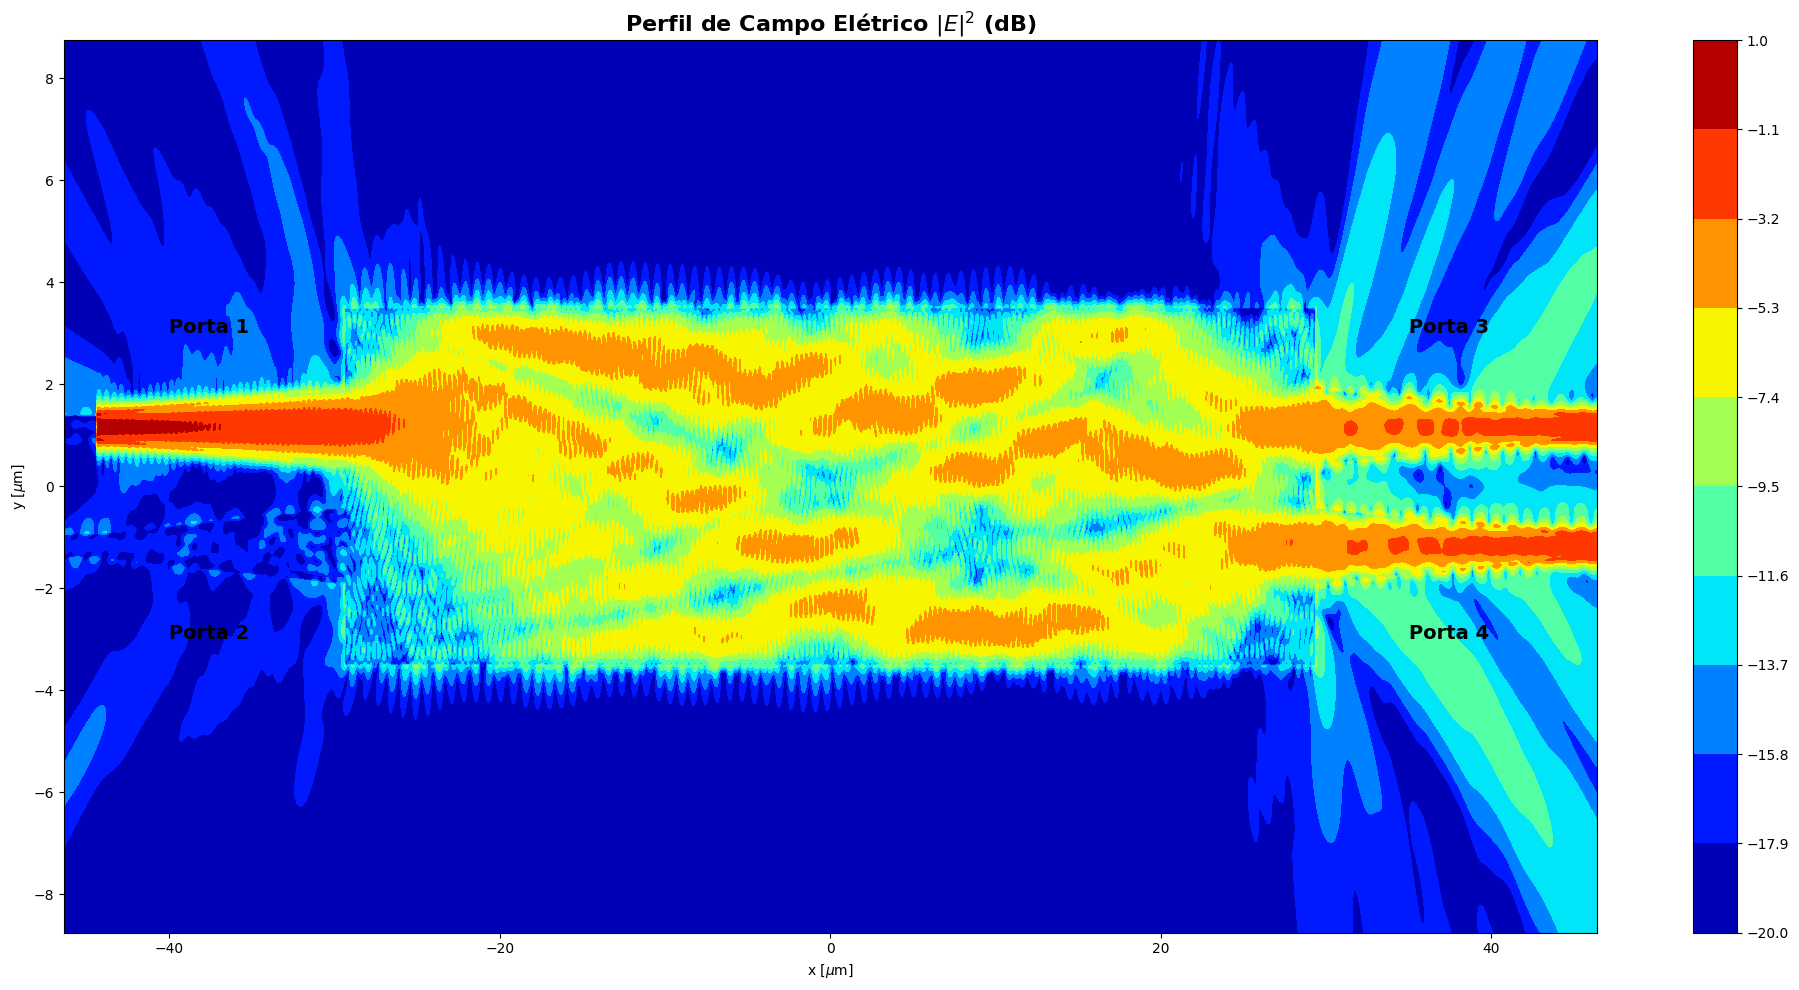

In [54]:
plt.figure(figsize=(20, 10))
mycmap = plt.get_cmap('jet')

v = np.linspace(-20,1,11,endpoint=True)

plt.contourf(x,y,np.clip(10*np.log10(np.transpose(Emag[:,:,0])), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=v)

plt.title(r'Perfil de Campo Elétrico $|E|^2$ (dB)', fontsize = 16,  fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.text(-40, 3, 'Porta 1', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(-40, -3, 'Porta 2', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, 3, 'Porta 3', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, -3, 'Porta 4', fontsize = 14, fontweight = 'bold', color = 'k')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - LOG - varFDTD - TE.png')
plt.show()

In [55]:
trans_1 = modeApi.getresult('Porta 1', 'T')
trans_2 = modeApi.getresult('Porta 2', 'T')
trans_3 = modeApi.getresult('Porta 3', 'T')
trans_4 = modeApi.getresult('Porta 4', 'T')

trans_1_dB = 10*np.log10(np.abs(trans_1['T']))
trans_2_dB = 10*np.log10(np.abs(trans_2['T']))
trans_3_dB = 10*np.log10(np.abs(trans_3['T']))
trans_4_dB = 10*np.log10(np.abs(trans_4['T']))

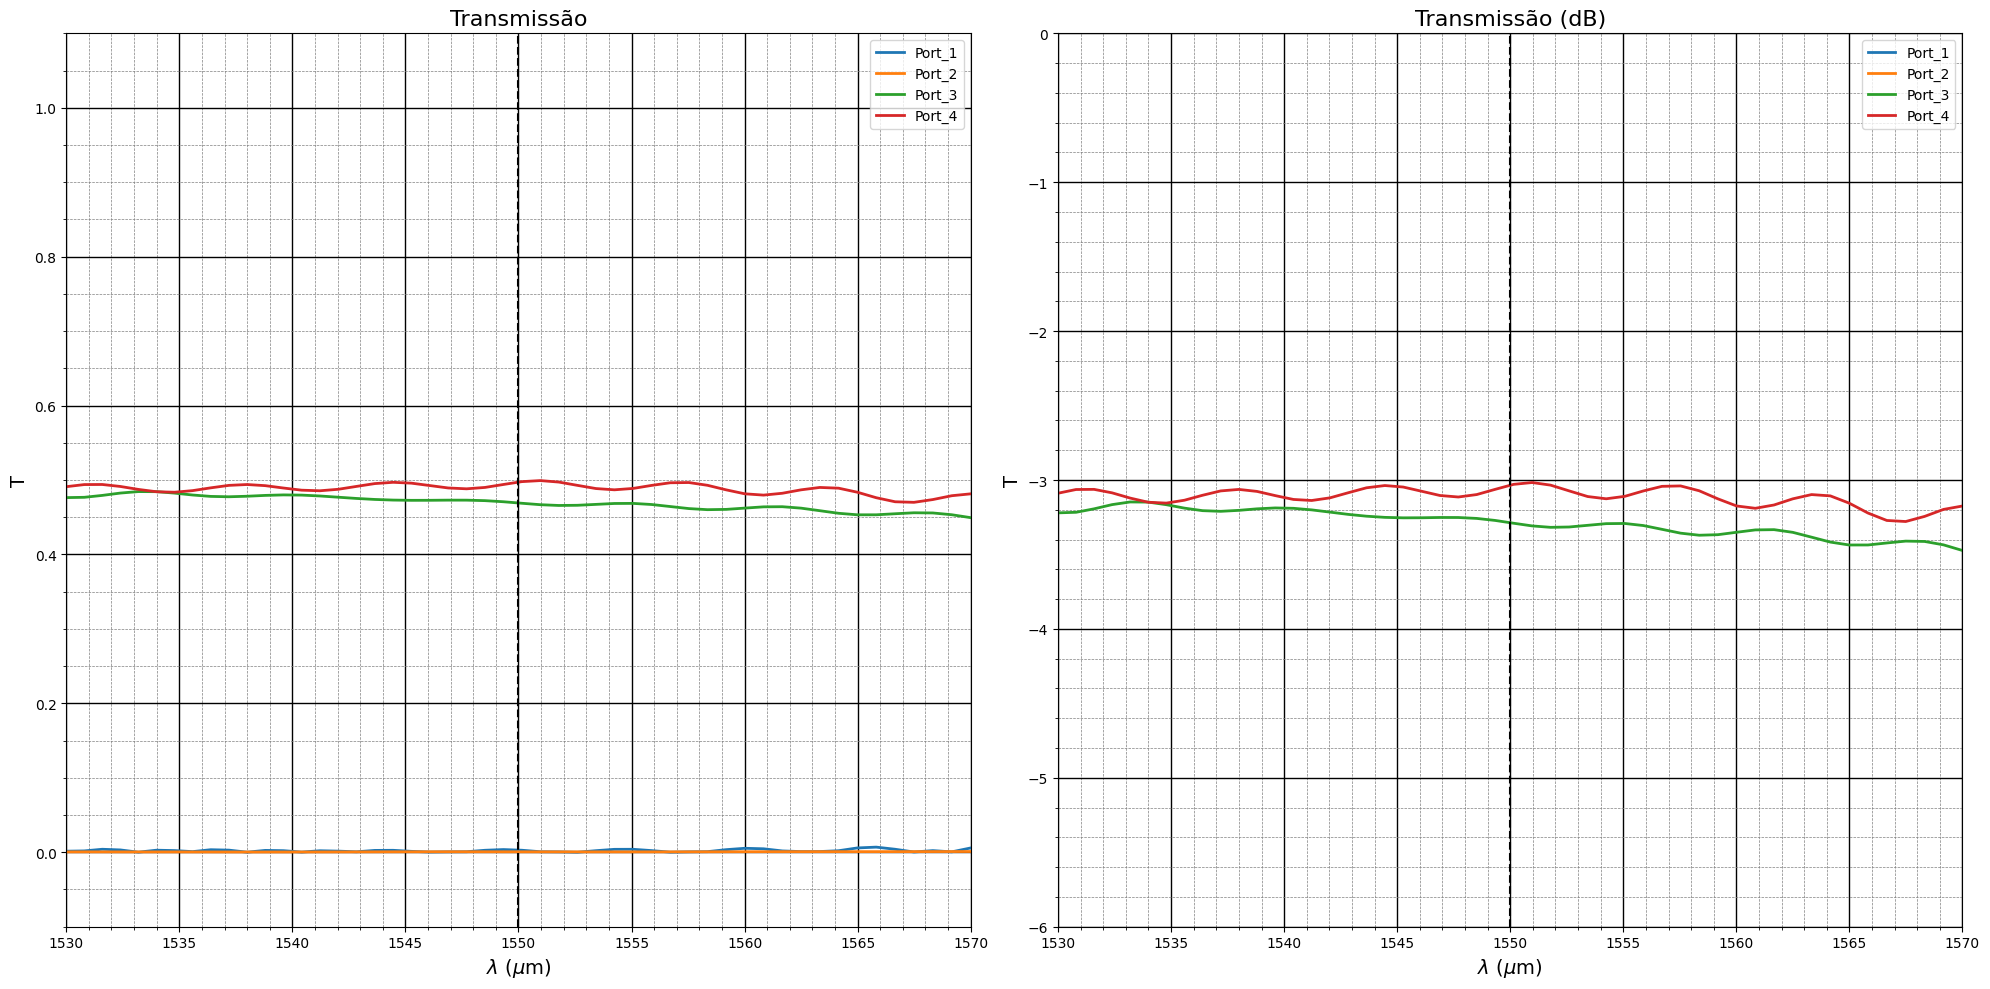

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].plot(trans_1['lambda']/nm, np.abs(trans_1['T']), label = 'Port_1', linewidth=2)
axs[0].plot(trans_2['lambda']/nm, np.abs(trans_2['T']), label = 'Port_2', linewidth=2)
axs[0].plot(trans_3['lambda']/nm, np.abs(trans_3['T']), label = 'Port_3', linewidth=2)
axs[0].plot(trans_4['lambda']/nm, np.abs(trans_4['T']), label = 'Port_4', linewidth=2)
axs[0].axvline(x=lmbd/nm, color='k', linestyle='--')
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[0].set_ylabel('T', fontsize=14)
axs[0].set_xlim([lmbd_start/nm, lmbd_stop/nm])
axs[0].set_ylim([-0.1,1.1])
axs[0].set_title(r'Transmissão', fontsize=16)
axs[0].legend()
axs[0].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[0].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[0].minorticks_on()

axs[1].plot(trans_1['lambda']/nm, trans_1_dB, label = 'Port_1', linewidth=2)
axs[1].plot(trans_2['lambda']/nm, trans_2_dB, label = 'Port_2', linewidth=2)
axs[1].plot(trans_3['lambda']/nm, trans_3_dB, label = 'Port_3', linewidth=2)
axs[1].plot(trans_4['lambda']/nm, trans_4_dB, label = 'Port_4', linewidth=2)
axs[1].axvline(x=lmbd/nm, color='k', linestyle='--')
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[1].set_ylabel('T', fontsize=14)
axs[1].set_xlim([lmbd_start/nm, lmbd_stop/nm])
axs[1].set_ylim([-6,0])
axs[1].set_title(r'Transmissão (dB)', fontsize=16)
axs[1].legend()
axs[1].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[1].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[1].minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas - varFDTD - TE.png')
plt.show()

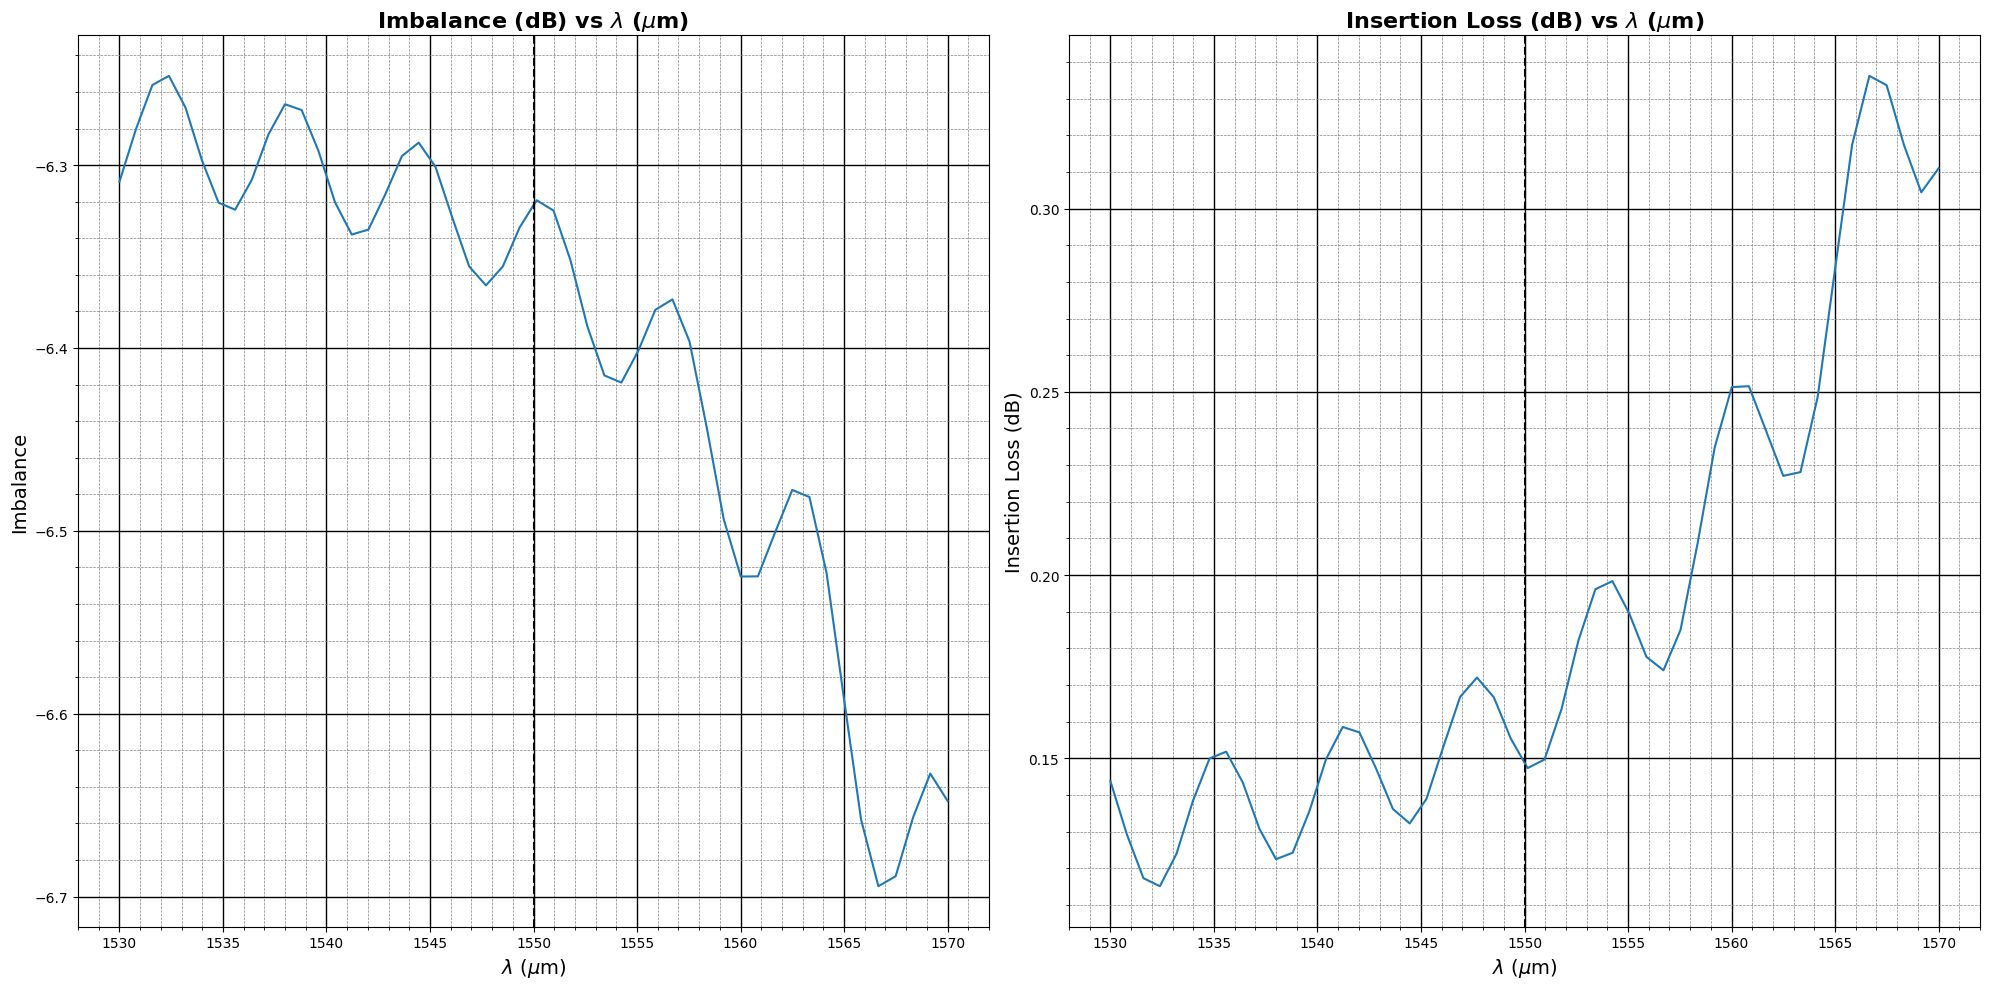

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

Ib =  trans_3_dB + trans_4_dB
axs[0].plot(trans_1['lambda']/nm, Ib, lw=1.5)
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[0].set_ylabel('Imbalance', fontsize=14)
axs[0].set_title(r'Imbalance (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[0].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[0].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[0].minorticks_on()
axs[0].axvline(x=lmbd/nm, color='k', linestyle='--')

Il = -10*np.log10(trans_3['T'] + trans_4['T'])
axs[1].plot(trans_1['lambda']/nm, Il, lw=1.5)
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[1].set_ylabel('Insertion Loss (dB)', fontsize=14)
axs[1].set_title(r'Insertion Loss (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[1].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[1].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[1].minorticks_on()
axs[1].axvline(x=lmbd/nm, color='k', linestyle='--')

plt.tight_layout()
plt.savefig('Imbalance e Perda de Inserção nas portas - varFDTD - TE.png')
plt.show()

In [58]:
modeApi.switchtolayout()

modeApi.select('varFDTD')
modeApi.set("z min bc", "Anti-Symmetric")

modeApi.save('MMI_SIMULACAO')

In [59]:
modeApi.run()

In [60]:
E = modeApi.getresult('monitor', 'E')

x = E['x']
x = x[:,0]/um

y = E['y']
y = y[:,0]/um

z = E['z']
E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + Ez**2)

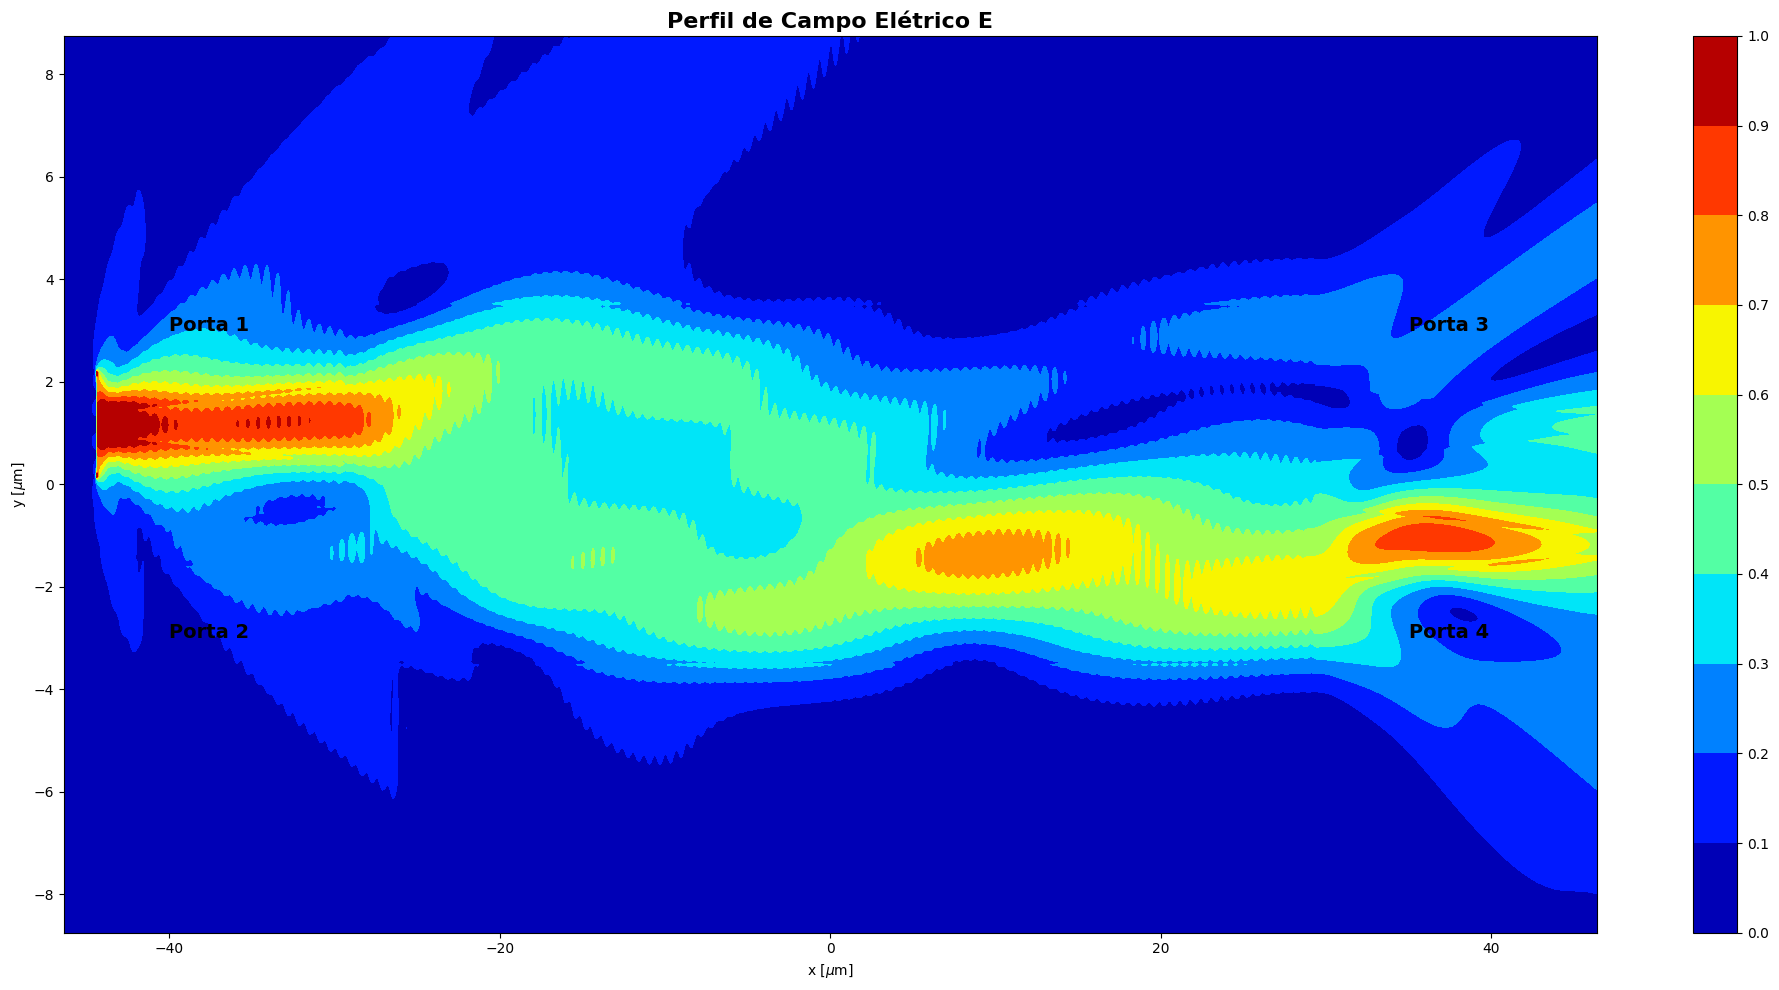

In [61]:
plt.figure(figsize=(20, 10))
mycmap = plt.get_cmap('jet')

v = np.linspace(0,1,11,endpoint=True)

plt.contourf(x,y,np.clip(np.transpose(Emag[:,:,0]), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=v)

plt.title('Perfil de Campo Elétrico E', fontsize = 16, fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.text(-40, 3, 'Porta 1', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(-40, -3, 'Porta 2', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, 3, 'Porta 3', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, -3, 'Porta 4', fontsize = 14, fontweight = 'bold', color = 'k')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - Linear - varFDTD - TM.png')
plt.show()

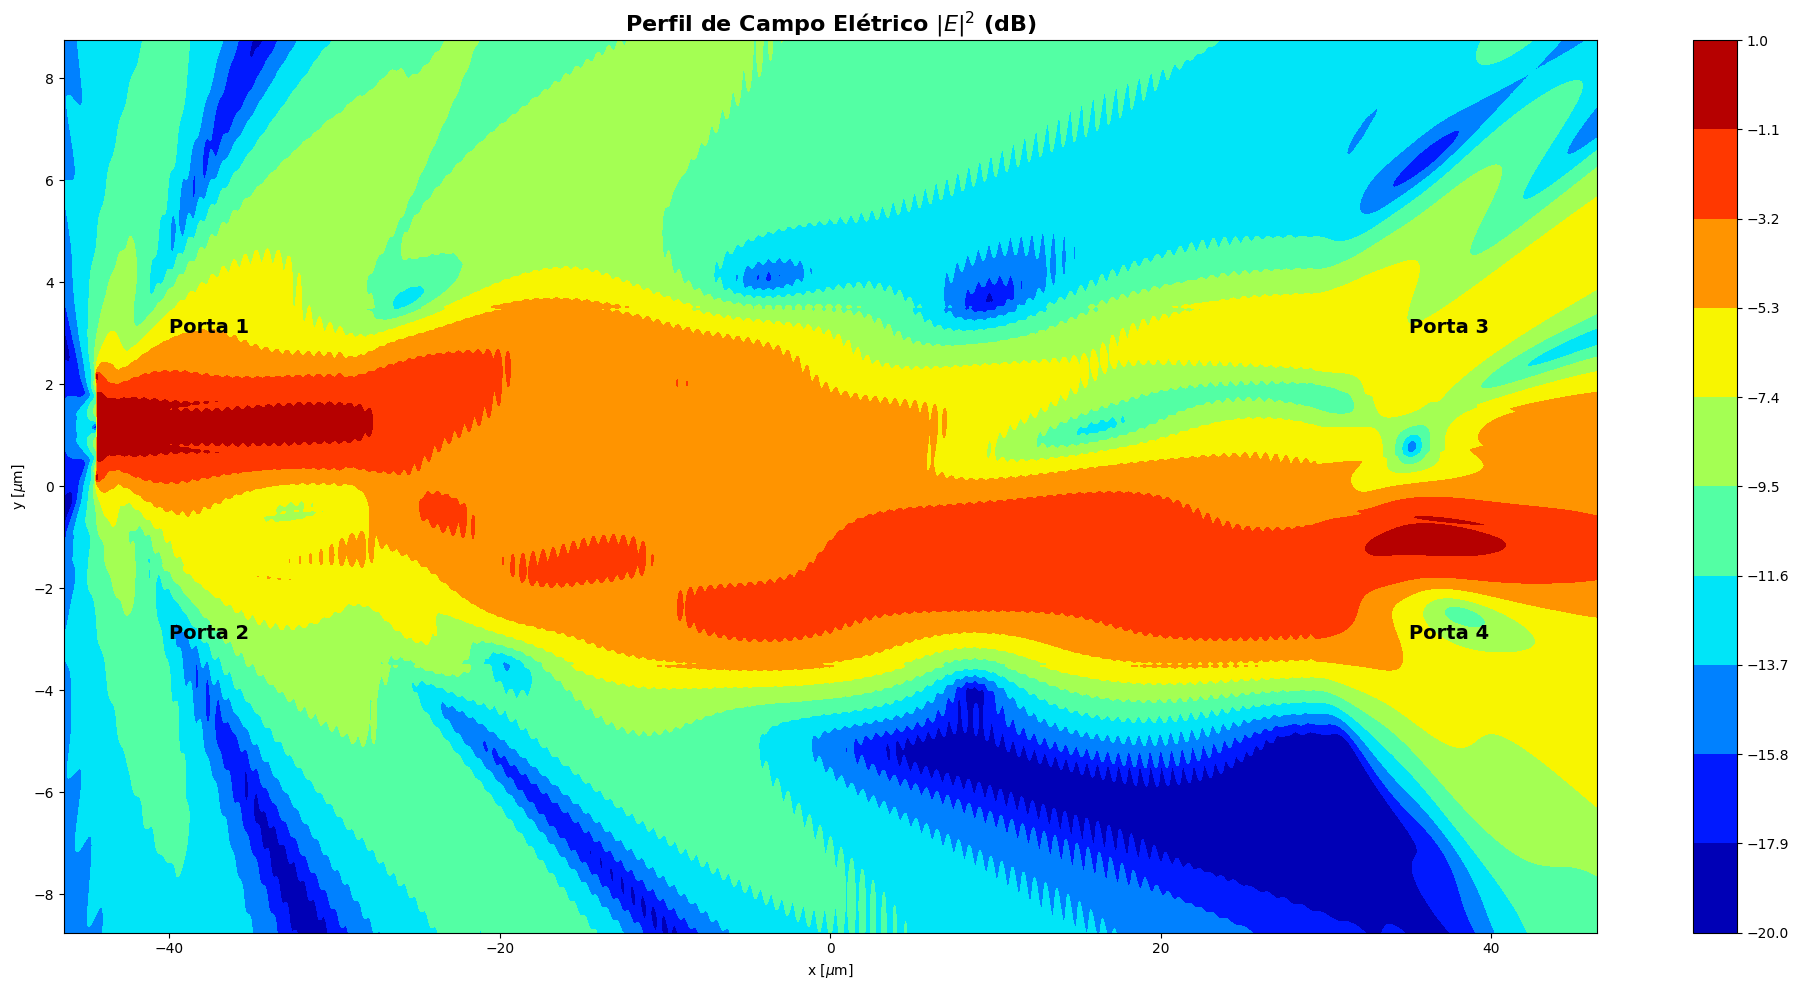

In [62]:
plt.figure(figsize=(20, 10))
mycmap = plt.get_cmap('jet')

v = np.linspace(-20,1,11,endpoint=True)

plt.contourf(x,y,np.clip(10*np.log10(np.transpose(Emag[:,:,0])), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=v)

plt.title(r'Perfil de Campo Elétrico $|E|^2$ (dB)', fontsize = 16,  fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.text(-40, 3, 'Porta 1', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(-40, -3, 'Porta 2', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, 3, 'Porta 3', fontsize = 14, fontweight = 'bold', color = 'k')
plt.text(35, -3, 'Porta 4', fontsize = 14, fontweight = 'bold', color = 'k')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - LOG - varFDTD - TM.png')
plt.show()

In [63]:
trans_1 = modeApi.getresult('Porta 1', 'T')
trans_2 = modeApi.getresult('Porta 2', 'T')
trans_3 = modeApi.getresult('Porta 3', 'T')
trans_4 = modeApi.getresult('Porta 4', 'T')

trans_1_dB = 10*np.log10(np.abs(trans_1['T']))
trans_2_dB = 10*np.log10(np.abs(trans_2['T']))
trans_3_dB = 10*np.log10(np.abs(trans_3['T']))
trans_4_dB = 10*np.log10(np.abs(trans_4['T']))

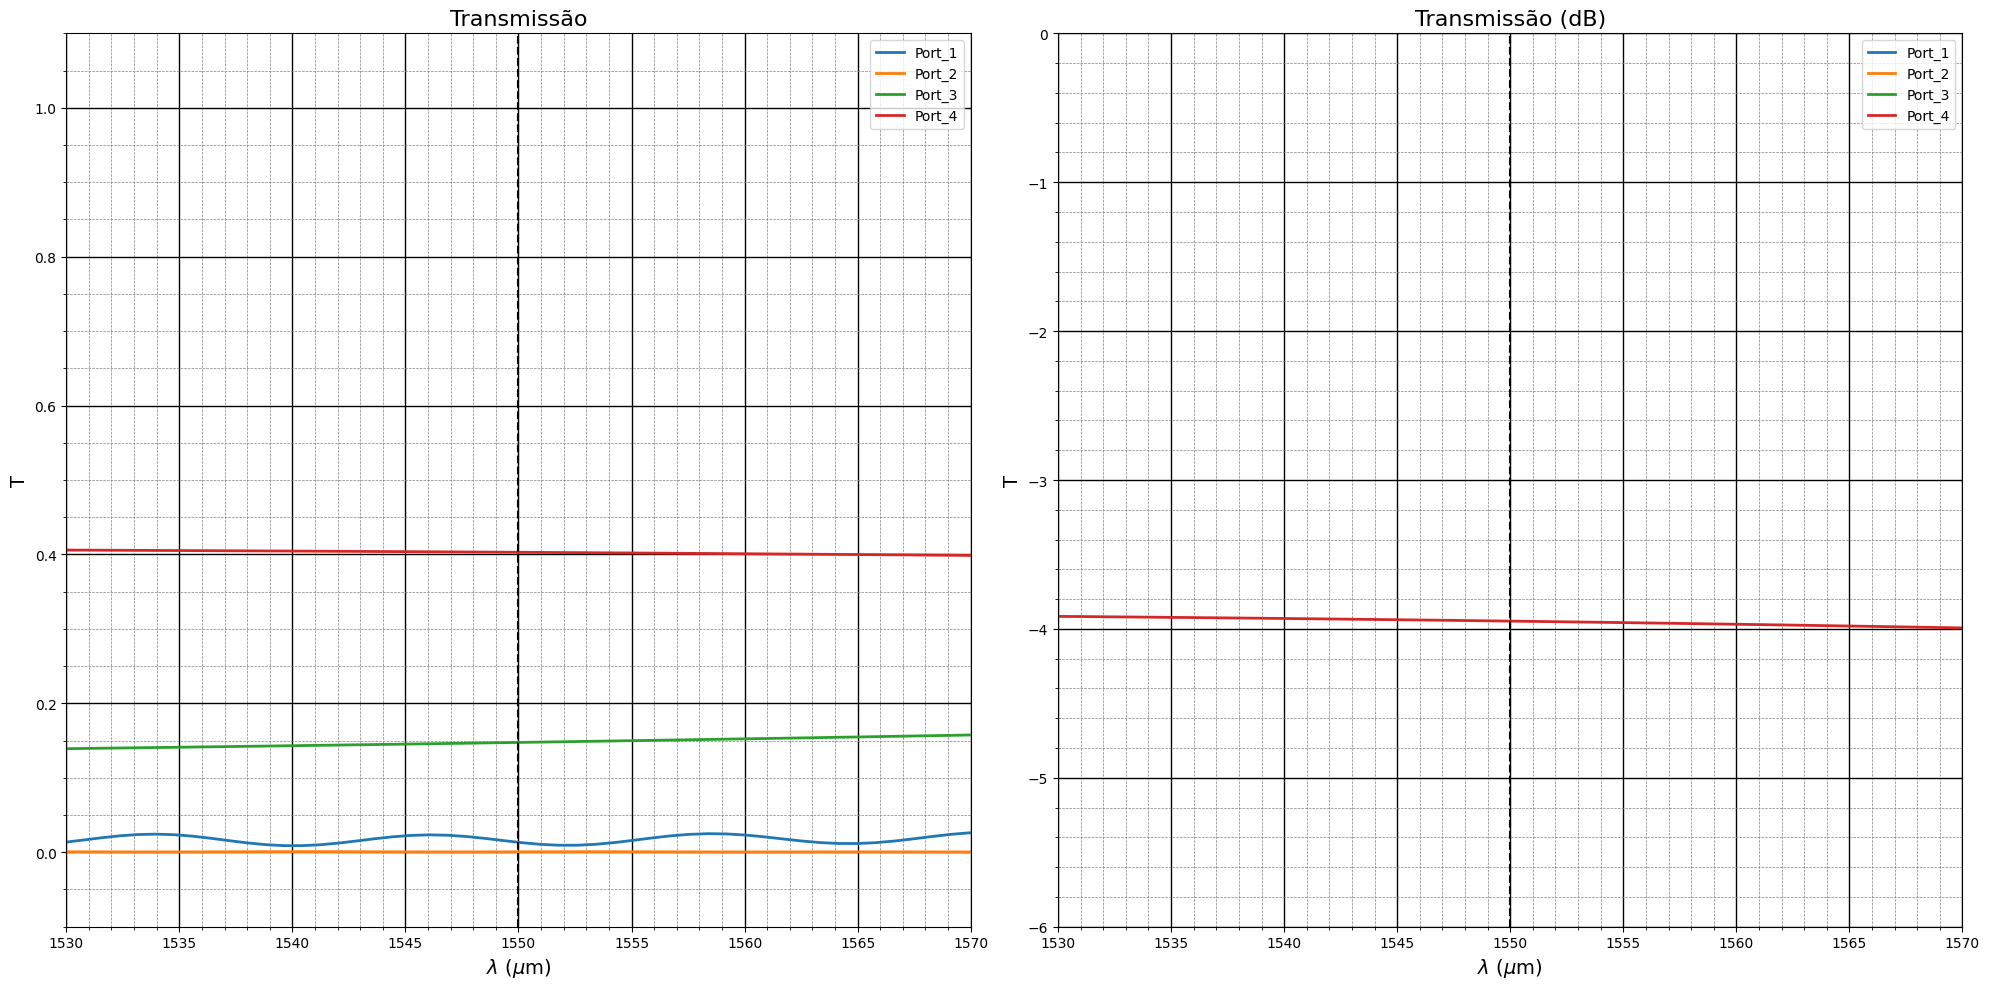

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].plot(trans_1['lambda']/nm, np.abs(trans_1['T']), label = 'Port_1', linewidth=2)
axs[0].plot(trans_2['lambda']/nm, np.abs(trans_2['T']), label = 'Port_2', linewidth=2)
axs[0].plot(trans_3['lambda']/nm, np.abs(trans_3['T']), label = 'Port_3', linewidth=2)
axs[0].plot(trans_4['lambda']/nm, np.abs(trans_4['T']), label = 'Port_4', linewidth=2)
axs[0].axvline(x=lmbd/nm, color='k', linestyle='--')
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[0].set_ylabel('T', fontsize=14)
axs[0].set_xlim([lmbd_start/nm, lmbd_stop/nm])
axs[0].set_ylim([-0.1,1.1])
axs[0].set_title(r'Transmissão', fontsize=16)
axs[0].legend()
axs[0].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[0].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[0].minorticks_on()

axs[1].plot(trans_1['lambda']/nm, trans_1_dB, label = 'Port_1', linewidth=2)
axs[1].plot(trans_2['lambda']/nm, trans_2_dB, label = 'Port_2', linewidth=2)
axs[1].plot(trans_3['lambda']/nm, trans_3_dB, label = 'Port_3', linewidth=2)
axs[1].plot(trans_4['lambda']/nm, trans_4_dB, label = 'Port_4', linewidth=2)
axs[1].axvline(x=lmbd/nm, color='k', linestyle='--')
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[1].set_ylabel('T', fontsize=14)
axs[1].set_xlim([lmbd_start/nm, lmbd_stop/nm])
axs[1].set_ylim([-6,0])
axs[1].set_title(r'Transmissão (dB)', fontsize=16)
axs[1].legend()
axs[1].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[1].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[1].minorticks_on()


plt.tight_layout()
plt.savefig('Transmissão nas portas - varFDTD - TM.png')
plt.show()

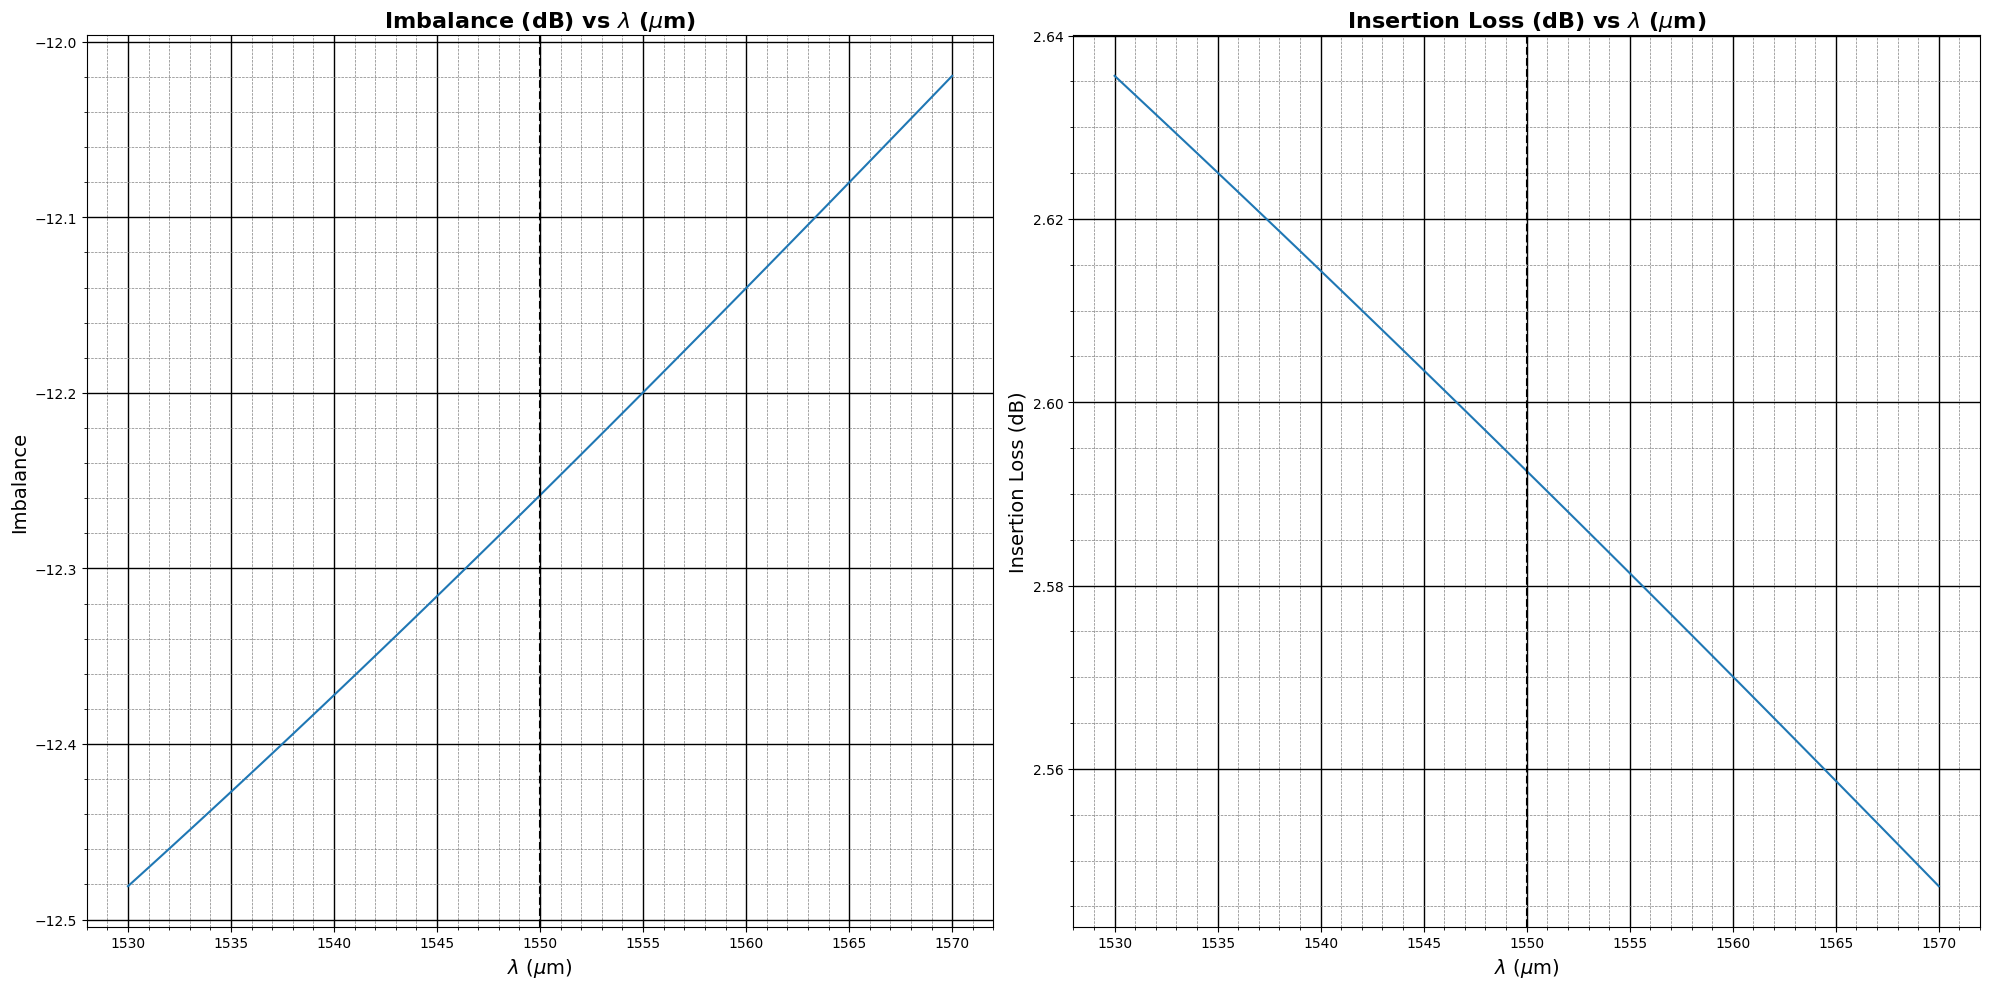

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

Ib =  trans_3_dB + trans_4_dB
axs[0].plot(trans_1['lambda']/nm, Ib, lw=1.5)
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[0].set_ylabel('Imbalance', fontsize=14)
axs[0].set_title(r'Imbalance (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[0].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[0].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[0].minorticks_on()
axs[0].axvline(x=lmbd/nm, color='k', linestyle='--')

Il = -10*np.log10(trans_3['T'] + trans_4['T'])
axs[1].plot(trans_1['lambda']/nm, Il, lw=1.5)
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
axs[1].set_ylabel('Insertion Loss (dB)', fontsize=14)
axs[1].set_title(r'Insertion Loss (dB) vs $\lambda$ ($\mu$m)', fontsize=16, fontweight = 'bold',)
axs[1].grid(True, which='major', linestyle='-', linewidth=1, color='black')
axs[1].grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
axs[1].minorticks_on()
axs[1].axvline(x=lmbd/nm, color='k', linestyle='--')

plt.tight_layout()
plt.savefig('Imbalance e Perda de Inserção nas portas - varFDTD - TM.png')
plt.show()